# What do we mean when we say gestures are more expressive than vocalizations? An experimental and simulation study

created by: @sarkadava

This script....

## Basic settings

We first load in the German data estimated from the Bayesian modeling, and merge the data with information from the basic concept list (e.g., semantic category, PoS, etc.)

In [1]:
# Load packages
import os
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import random
import beepy


# Prepare data
curfolder = os.getcwd()
parentfolder = os.path.abspath(os.path.join(curfolder, os.pardir))

datafolder = os.path.join(parentfolder, 'datasets')
plotfolder = os.path.join(parentfolder, 'plots')

# print(datafolder)

# Load data
express = pd.read_csv(os.path.join(datafolder, 'df_estim_dutch.csv'))
concepts = pd.read_excel(os.path.join(datafolder, 'concept_list_info.xlsx'))

# print(express)
# print(concepts)

# Rename column German to word
concepts = concepts.rename(columns={'Dutch': 'word'})

# Columns PoS and SemanticCat from concepts to df
df = pd.merge(express, concepts[['word', 'PoS', 'SemanticCat']], on='word')

# Get rid of multimodal data
df = df[df['modality'] != 'multimodal']
df = df.drop_duplicates(subset=['word', 'modality'], keep='first')

# rename value 'locomotion' in SemanticCat to 'motion'
df.loc[df['SemanticCat'] == 'locomotion', 'SemanticCat'] = 'motion'

# delete following columns
df = df.drop(columns=['n', 'diff_expr', 'diff_rank', 'SemanticSubcat'])

# get rid of the first, unnamed column
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df.head(15)


,word,modality,fit,se,lwr,upr,avg_expressibility_norm,German,English,PoS,SemanticCat
0,aanraken,gesture,0.670934,0.039554,0.587932,0.744501,0.680309,Berührung,touch,noun,sensory
2,aanraken,vocal,0.207245,0.038715,0.139747,0.296912,0.177373,Berührung,touch,noun,sensory
3,aarde,gesture,0.538903,0.048951,0.439701,0.630708,0.543955,Erde,soil,noun,environment
5,aarde,vocal,0.195023,0.038012,0.131692,0.282805,0.170487,Erde,soil,noun,environment
6,ademen,gesture,0.781561,0.031752,0.712780,0.837315,0.765703,atmen,to breathe,verb,sensory
8,ademen,vocal,0.784779,0.034433,0.707833,0.846537,0.818681,atmen,to breathe,verb,sensory
9,alles,gesture,0.351045,0.044295,0.270716,0.440715,0.360793,alles,all,pronoun,abstract
11,alles,vocal,0.117868,0.027274,0.073675,0.182893,0.080647,alles,all,pronoun,abstract
12,arm (lichaam),gesture,0.537118,0.042505,0.452153,0.619444,0.526008,Arm,arm,noun,body
14,arm (lichaam),vocal,0.126830,0.026649,0.084371,0.192336,0.079813,Arm,arm,noun,body


## Data check, descriptives and plots

Let's check how the data looks like

c:\Users\kadava\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kadava\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\kadava\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\kadava\AppData\Local\anaconda3\Lib\site-packages\seabo

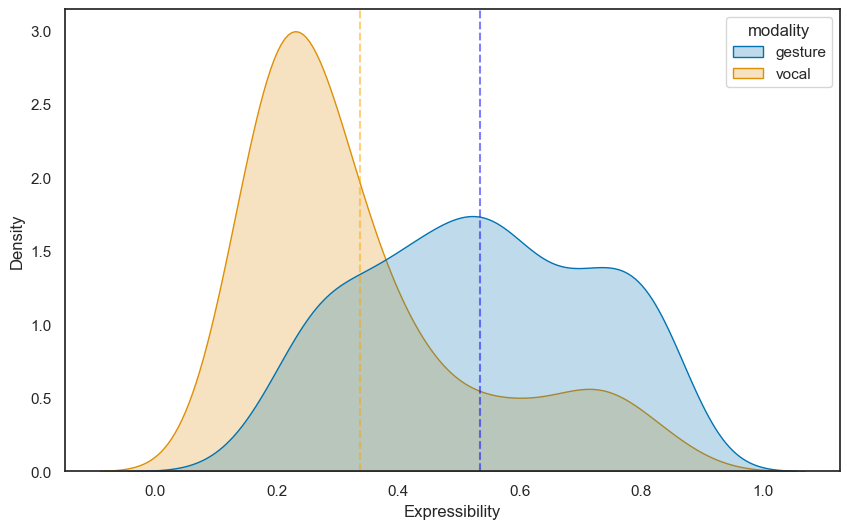

In [3]:
# Create a density plot

sns.set_theme(style="white", palette="colorblind", font='Arial', font_scale=1)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='fit', hue='modality', fill=True, common_norm=False)
plt.xlabel('Expressibility')
plt.ylabel('Density')

# Dashed line for mean
plt.axvline(x=df[df['modality'] == 'vocal']['fit'].mean(), color='orange', linestyle='--', alpha=0.5)
plt.axvline(x=df[df['modality'] == 'gesture']['fit'].mean(), color='blue', linestyle='--', alpha=0.5)

plt.show()


C:\Users\kadava\AppData\Local\Temp\ipykernel_15468\2348153862.py:18: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="modality", y="fit", data=df, palette=palette, dodge=False, ax=ax)
c:\Users\kadava\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kadava\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kadava\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version 

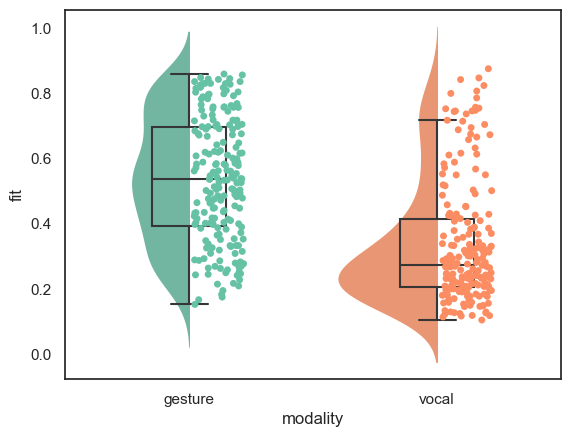

In [4]:
# Density plot with boxplot

sns.set_style('white')
palette = 'Set2'
ax = sns.violinplot(x="modality", y="fit", data=df, dodge=False,
                    palette=palette,
                    density_norm='width', inner=None, edgecolor=None, linewidth=0)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
for violin in ax.collections:
    bbox = violin.get_paths()[0].get_extents()
    x0, y0, width, height = bbox.bounds
    violin.set_clip_path(plt.Rectangle((x0, y0), width / 2, height, transform=ax.transData))

sns.boxplot(x="modality", y="fit", data=df, saturation=1, showfliers=False,
            width=0.3, boxprops={'zorder': 3, 'facecolor': 'none'}, ax=ax)
old_len_collections = len(ax.collections)
sns.stripplot(x="modality", y="fit", data=df, palette=palette, dodge=False, ax=ax)
for dots in ax.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([0.12, 0]))
ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.show()

So gesture expressibility is slightly better, but we have some overlap, and vocal expressibility has quite a long (positive) tail

In [5]:
# Some descriptive statistics

## Mean
df.groupby('modality')['fit'].mean() 

## Standard deviation
df.groupby('modality')['fit'].std()

## Median
df.groupby('modality')['fit'].median()

# Table with all the statistics
print(df.groupby('modality')['fit'].agg(['mean', 'std', 'median']))


              mean       std    median
modality                              
gesture   0.534506  0.189954  0.535898
vocal     0.337130  0.188260  0.273983


c:\Users\kadava\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kadava\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


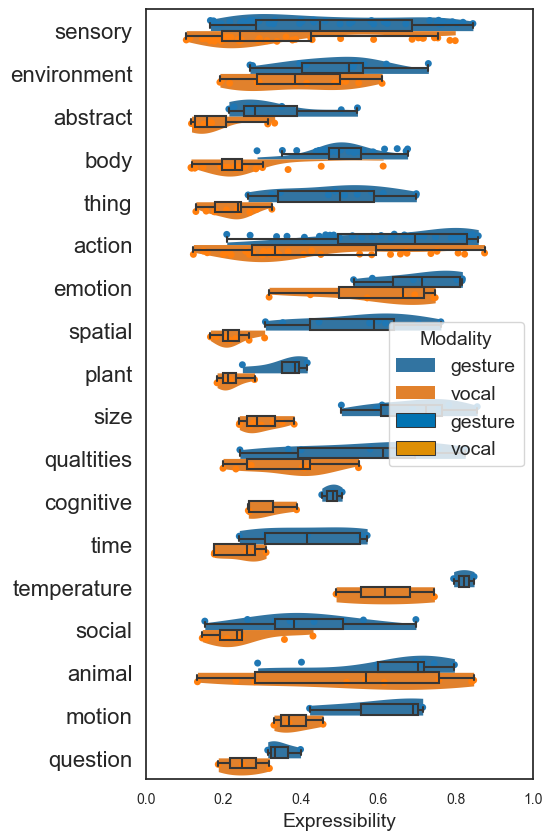

In [6]:
# Gesture and vocal modality stratified by semantic category

plt.rcParams['font.family'] = 'Times New Roman'

sns.set_style('white')
plt.figure(figsize=(5, 10))  
palette = sns.color_palette("tab10", 2)

ax = sns.violinplot(y="SemanticCat", x="fit", hue="modality", data=df, dodge=True,
                    palette=palette, split=True, inner=None, edgecolor=None, linewidth=0, legend=False, scale='width', alpha=0.9, cut=0)

for violin in ax.collections:
    bbox = violin.get_paths()[0].get_extents()
    x0, y0, width, height = bbox.bounds
    violin.set_clip_path(plt.Rectangle((x0, y0), width, height, transform=ax.transData))

sns.boxplot(y="SemanticCat", x="fit", hue="modality", data=df, saturation=1, showfliers=False,
            width=0.5, boxprops={'zorder': 3, 'facecolor': 'none'}, ax=ax)

old_len_collections = len(ax.collections)
sns.stripplot(y="SemanticCat", x="fit", hue="modality", data=df, palette=palette, dodge=True, ax=ax, legend=False, zorder=1)

for dots in ax.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([0, 0]))

plt.legend(title='Modality', title_fontsize='14', fontsize='14')
plt.xticks(rotation=0)  # Rotate x-axis labels
plt.xticks(fontsize=10)  
plt.yticks(fontsize=16)  
plt.xlabel('Expressibility', fontsize=14)  
plt.ylabel('')  
plt.xlim(0, 1)  
plt.show()


Most of the categories seem to have different distributions but in general they kind of overlap - see, e.g., sensory, environment. That has few exceptions such as motion, or cognitive concepts.

c:\Users\kadava\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kadava\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\kadava\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\kadava\AppData\Local\anaconda3\Lib\site-packages\seabo

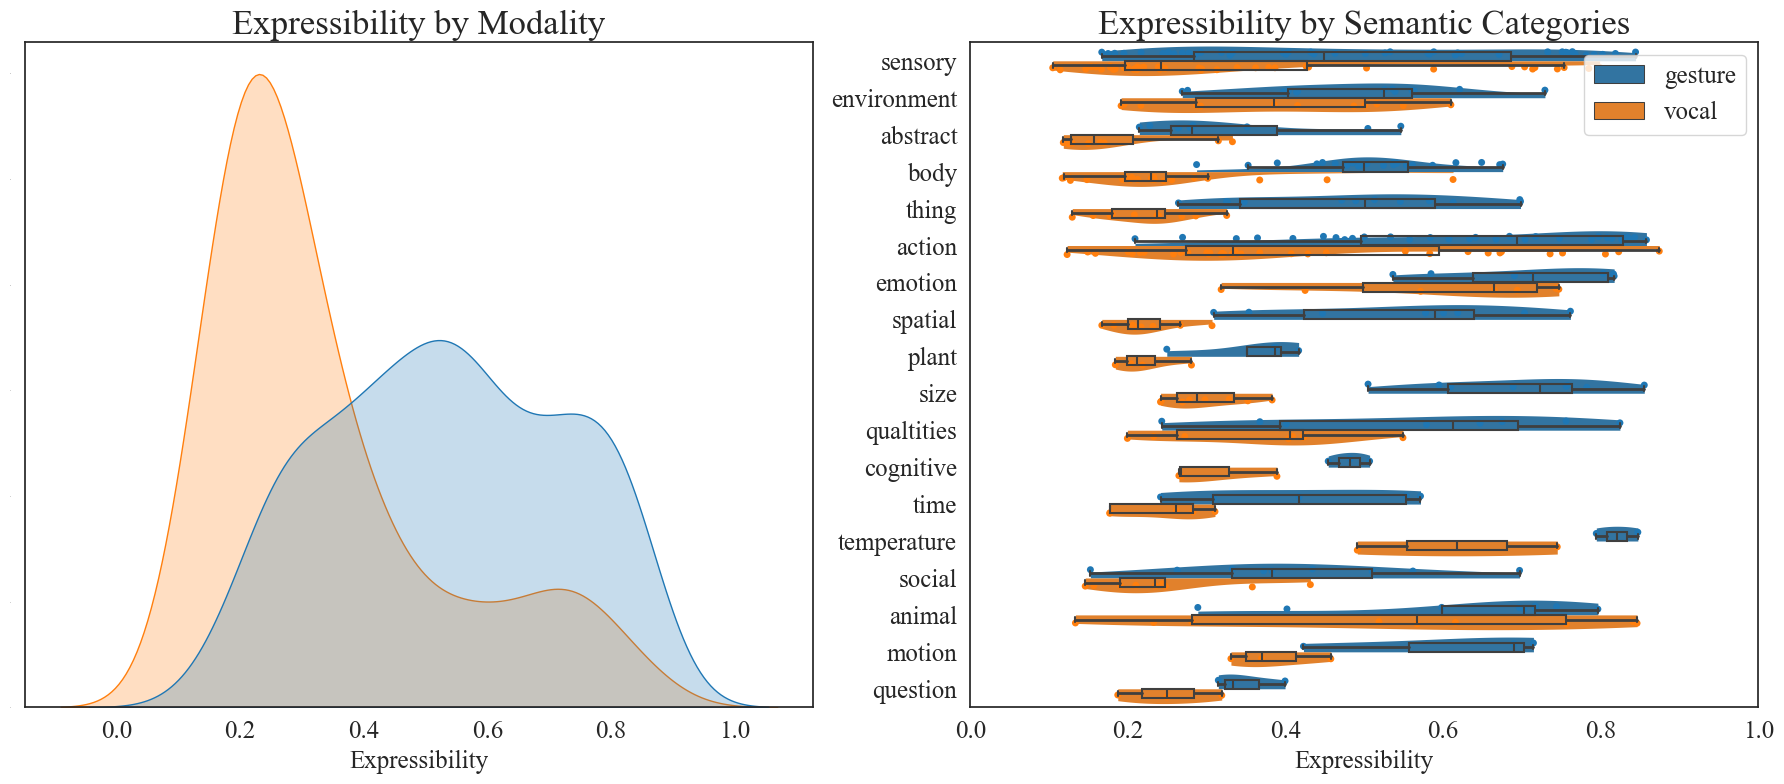

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set overall aesthetics
sns.set_theme(style="white", palette="colorblind", font='Arial', font_scale=1)
plt.rcParams['font.family'] = 'Times New Roman'

# === Plot 2: Violin + Box + Strip Plot ===
palette = sns.color_palette("tab10", 2)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # 1 row, 2 columns

# === Plot 1: KDE Plot ===
sns.kdeplot(data=df, x='fit', hue='modality', fill=True, common_norm=False, ax=axes[0], palette=palette, legend=False)
axes[0].set_xlabel('Expressibility', fontsize=18)
axes[0].set_ylabel('')
axes[0].set_title("Expressibility by Modality", fontsize=25)
axes[0].tick_params(axis='x', labelrotation=0, labelsize=18)
axes[0].tick_params(axis='y', labelsize=0)
# legend
#axes[0].legend(title='Modality', title_fontsize=14, fontsize=18)

# Add dashed lines for means
# modality_means = df.groupby('modality')['fit'].mean()
# colors = {'vocal': 'orange', 'gesture': 'blue'}
# for modality, color in colors.items():
#     axes[0].axvline(x=modality_means[modality], color=color, linestyle='--', alpha=0.5)

    


# Violin plot
sns.violinplot(y="SemanticCat", x="fit", hue="modality", data=df, dodge=True,
               palette=palette, split=True, inner=None, scale='width',
               linewidth=0, cut=0, ax=axes[1], alpha=0.9)

# Boxplot on top (IMPORTANT: use same dodge=True and same hue order)
sns.boxplot(y="SemanticCat", x="fit", hue="modality", data=df, dodge=True,
            width=0.5, palette=palette, showcaps=True, boxprops={'facecolor': 'none', 'zorder': 3},
            showfliers=False, whiskerprops={'linewidth': 2}, ax=axes[1])

# Stripplot overlay
sns.stripplot(y="SemanticCat", x="fit", hue="modality", data=df,
              dodge=True, palette=palette, ax=axes[1], legend=False, zorder=1)

# Cleanup duplicate legends (from three hue layers)
handles, labels = axes[1].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axes[1].legend(by_label.values(), by_label.keys(), title='', title_fontsize=14, fontsize=18)

# Aesthetics
axes[1].tick_params(axis='x', labelrotation=0, labelsize=18)
axes[1].tick_params(axis='y', labelsize=18)
axes[1].set_xlabel('Expressibility', fontsize=18)
axes[1].set_ylabel('')
axes[1].set_xlim(0, 1)
axes[1].set_title("Expressibility by Semantic Categories", fontsize=25)


# Tight layout
plt.tight_layout()
plt.show()


## Simulations

* simulation 1 = random concepts without domain constrain

number of concepts 24 - 18 - 12 
number of 'participants': 20 - 15 - 10

* simulation  2 = random concepts from A-E-O semantic categories 

number of concepts 24 - 18 - 12 
number of 'participants': 20 - 15 - 10

* simulation 3 = random concepts from three random semantic categories

number of concepts 24 - 18 - 12 
number of 'participants': 20 - 15 - 10

* simulation 4 = random concepts from N-V-A (PoS)

number of concepts 24 - 18 - 12  
number of 'participants': 20 - 15 - 10

* simulation 5 (sanity check) = random concepts from vocal-favoring category

number of concepts 24 - 18 - 12
number of 'participants': 20 - 15 - 10

To compare the difference between two modalities, we perform unpaired t-test (because if participant guesses a concept in both modalities, there are cross-over effects), with Bayes Factor

package www: https://pingouin-stats.org/build/html/generated/pingouin.mwu.html#pingouin.mwu

BayesFactor X indicates that the observed data is x-time more likely under the alternative hypotheses as under the model that predicts no effect (no difference between gesture and vocalization)

There is also BEST package but we had issues to install: https://best.readthedocs.io/en/latest/index.html

*Note - don't run if strictly necessary, the simulations take some time. You can find the data as .npy arrays in folder Data*

### Function to simulate experiments

In [6]:
def simulate_experiment(domain, categories, num_sim, num_words, num_data, concepts, distribution_matrix, num_cat=3):
    # Domain is the variable from which you want to draw category (e.g., PoS, semantic category)
    # Categories is a list of categories
    # Num_cat is number of categories, 3 default
    # Num_sim is number of simulations
    # Num_words is number of concepts per category
    # Concepts is the concepts df
    # Distribution_matrix is the matrix of distribution (e.g., posterior predictive distribution)

    # If domain and categories are None, just sample the num_words without domain constrain  
    if domain is None and categories is None:
        # Make a list of unique words
        unique_words = concepts['word'].unique()
        # Create as many empty lists as there is simulations
        samples = [[] for _ in range(num_sim)]
        # For each of the lists, append x random words 
        for i in range(num_sim):
            samples[i].append(random.sample(list(unique_words), num_words))
        # Concatenate the lists
        samples = [x for y in samples for x in y]

    # If domain is random, sample the num_words from random categories
    elif domain is not None and categories == 'random':
        samples = []
        # Create a list of SemanticCat from concepts_df
        cats = concepts[domain].unique()
        min_occurence = num_words * 2 # 2 modalities

        # Which categories have less than min_occurence words?
        to_delete = []
        for i in cats:
            if len(concepts[concepts[domain] == i]) < min_occurence: 
                # print(i)
                # Append to list to delete
                to_delete.append(i)
        # Make a new df without the categories in to_delete
        concepts_temp = concepts[~concepts[domain].isin(to_delete)]
        for i in range(num_sim):
            # Pick three random values of SemanticCat
            cat = random.sample(list(concepts_temp[domain].unique()), num_cat)
            # print(cat)
            # Make lists of unique words from these categories
            words_cat1 = concepts_temp[concepts_temp[domain] == cat[0]]['word'].unique()
            words_cat2 = concepts_temp[concepts_temp[domain] == cat[1]]['word'].unique()
            words_cat3 = concepts_temp[concepts_temp[domain] == cat[2]]['word'].unique()
            
            # Select 6 words from each cat
            sample_cat1 = random.sample(list(words_cat1), num_words)
            sample_cat2 = random.sample(list(words_cat2), num_words)
            sample_cat3 = random.sample(list(words_cat3), num_words)

            # Concatenate the lists
            samples_category = [sample_cat1, sample_cat2, sample_cat3]
            # Concatenate the three lists inside the list into one list
            samples_category = [x for y in samples_category for x in y]
            # Append to categ_random
            samples.append(samples_category)
    
    # Otherwise, sample the num_words from the categories
    else:
        # For each category defined, make a list of the unique words
        unique_words = []
        for i in range(len(categories)):
            unique_words.append(concepts[concepts[domain] == categories[i]]['word'].unique())

        # Create as many empty lists as there are categories
        samples = [[] for _ in range(len(categories))]

        # For each of the lists, append x random words from the corresponding category
        for i in range(len(categories)):
            for _ in range(num_sim):
                samples[i].append(random.sample(list(unique_words[i]), num_words))

        # Bind the lists together 
        samples = list(zip(samples[0], samples[1], samples[2]))
        # Concatenate the lists
        samples = [[x for y in z for x in y] for z in samples]
        
    # Initiate empty list where we store all the experiments
    expressibility = []

    # Loop over each sample
    for sample in samples:

        # Initiate empty lists for each modality
        expr_voc_list = []
        expr_ges_list = []
    
        # For each concept in a sample, search for the corresponding indices for gesture and vocal modalities
        for concept in sample:
            # Search for the index of the concept in interest
            index_voc = concepts.loc[(concepts['word'] == concept) & (concepts['modality'] == 'vocal'), 'index'].values[0]
            index_ges = concepts.loc[(concepts['word'] == concept) & (concepts['modality'] == 'gesture'), 'index'].values[0]
            # For each value in ind_voc and ind_ges, pick x values from the ppd matrix from the corresponding column   
            expr_voc = np.random.choice(distribution_matrix[index_voc], num_data).tolist()
            expr_ges = np.random.choice(distribution_matrix[index_ges], num_data).tolist()
            # Append the values to the modality list for this sample
            expr_voc_list.append(expr_voc)
            expr_ges_list.append(expr_ges)
    
        # Combine exprs_voc and exprs_ges for each sample and add to expressibility
        combined_exprs = list(zip(sample, expr_voc_list, expr_ges_list))
        expressibility.append(combined_exprs)

    
    return expressibility


In [7]:
# Now let's prepare a function that will help us extract what we need

import pingouin as pg

def get_stats(sim_array):

    ttests_list = []

    for i in range(len(sim_array)):
        # This is the simulated expressibility
        express_array = np.array(sim_array[i])
        vocal = np.sum(express_array[:, 1])
        gesture = np.sum(express_array[:, 2])
        # Perform the t-test between gesture and vocal 
        ttest = pg.ttest(vocal, gesture, paired=False, r=0.5) 
        ttests_list.append(ttest)
    
    # Now we have a list of ttests, we need to extract the BF10 values from it
    bf10_list = []
    for i in range(len(ttests_list)):
        bf = ttests_list[i]['BF10'][0]
        bf10_list.append(bf)

    bf10_list = [float(i) for i in bf10_list]

    # Now we want also p-values
    pvalues_list = []
    for i in range(len(ttests_list)):
        p = ttests_list[i]['p-val'][0]
        pvalues_list.append(p)

    pvalues_list = [float(i) for i in pvalues_list]

    # And cohen d
    cohend_list = []
    for i in range(len(ttests_list)):
        co = ttests_list[i]['cohen-d'][0]
        cohend_list.append(co)
        
    cohend_list = [float(i) for i in cohend_list]

    # And t-value
    tvalue_list = []
    for i in range(len(ttests_list)):
        t = ttests_list[i]['T'][0]
        tvalue_list.append(t)

    tvalue_list = [float(i) for i in tvalue_list]

    return ttests_list, bf10_list, pvalues_list, cohend_list, tvalue_list

In [3]:
# These are folders where we store our data

ttestfolder = os.path.join(datafolder, 'ttest_results')
simfolder = os.path.join(datafolder, 'simulation_results')

In [9]:
# This is our concept list and ppd matrix

# Load in the ppd matrix
ppd = pd.read_csv(os.path.join(datafolder, 'ppd_matrix.csv'))
concepts = pd.read_csv(os.path.join(datafolder, 'empty_df.csv'))

# Create to concepts a column index
concepts['index'] = None

# Fill it will values from V1 to V414 so that we can access the ppd matrix
for i in range(1, 415):
    concepts['index'][i-1] = 'V' + str(i)

# Add relevant information
concepts_df = pd.merge(concepts, df[['word','SemanticCat', 'PoS']], on='word')

# Delete duplicate rows
concepts_df = concepts_df.drop_duplicates(subset=['word', 'modality'], keep='first')

concepts_df

C:\Users\kadava\AppData\Local\Temp\ipykernel_4860\3535829847.py:12: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  concepts['index'][i-1] = 'V' + str(i)
C:\Users\kadava\AppData\Local\Temp\ipykernel_4860\3535829847.py:12: FutureWarning: Chaine

,word,modality,index,SemanticCat,PoS
0,aanraken,gesture,V1,sensory,noun
2,aarde,gesture,V2,environment,noun
4,ademen,gesture,V3,sensory,verb
6,alles,gesture,V4,abstract,pronoun
8,arm (lichaam),gesture,V5,body,noun
...,...,...,...,...,...
814,zuur,vocal,V408,sensory,adjective
816,zwaar,vocal,V409,size,adjective
818,zwak,vocal,V410,qualtities,adjective
820,zwart,vocal,V411,sensory,adjective


### SIM 1

In [ ]:
# SIM1
# 18 concepts, 20 data points

# Set seed
random.seed(234)

exp_18_20 = simulate_experiment(None, None, 100000, 18, 20, concepts_df, ppd)

# Wrap as an object array
exp_18_20_obj = np.array(exp_18_20, dtype=object)

# Save it
np.save(os.path.join(simfolder, 'exp_18_20.npy'), exp_18_20_obj, allow_pickle=True)

beepy.beep(sound=2)

In [ ]:
# Load it in
exp_18_20 = np.load(os.path.join(simfolder, 'exp_18_20.npy'), allow_pickle=True)

# Get the stats
ttest_18_20, bf_18_20, p_18_20, d_18_20, t_18_20 = get_stats(exp_18_20)

# Save the ttest_18_20 as numpy
np.save(os.path.join(ttestfolder, 'ttest_18_20.npy'), ttest_18_20)

# How many bf10 values smaller than 3?
print('% of BF below 3: ', len([i for i in range(len(bf_18_20)) if bf_18_20[i] < 3]) / len(bf_18_20) * 100)

# What is the mean value of bf
print('mean BF: ', np.mean(bf_18_20))

# What is the mean of p-value
print('mean p-value: ', np.mean(p_18_20))

# What is the mean cohen-d
print('mean cohen-d: ', np.mean(d_18_20))

# Mean t-value
print('mean t-value: ', np.mean(t_18_20))

# % of BF below 3:  0.053
# mean BF:  4.597584284896643e+56
# mean p-value:  3.679186383423701e-05
# mean cohen-d:  0.6749490689304682
# mean t-value:  -9.05539199687231

C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bf = ttests_list[i]['BF10'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = ttests_list[i]['p-val'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  co = ttests_list[i]['cohen-d'

% of BF below 3:  0.053
mean BF:  4.597584284896643e+56
mean p-value:  3.679186383423701e-05
mean cohen-d:  0.6749490689304682
mean t-value:  -9.05539199687231


In [33]:
# SIM1
# 18 concepts, 15 data points

# Set seed
random.seed(345)

exp_18_15 = simulate_experiment(None, None, 100000, 18, 15, concepts_df, ppd)

# Wrap as an object array
exp_18_15_obj = np.array(exp_18_15, dtype=object)

# Save it as npy
np.save(os.path.join(simfolder, 'exp_18_15.npy'), exp_18_15_obj, allow_pickle=True)

beepy.beep(sound=2)


In [ ]:
# Load it in
exp_18_15 = np.load(os.path.join(simfolder, 'exp_18_15.npy'), allow_pickle=True)

# Get the stats
ttest_18_15, bf_18_15, p_18_15, d_18_15, t_18_15 = get_stats(exp_18_15)

# Save the ttest_18_15 as numpy
np.save(os.path.join(ttestfolder, 'ttest_18_15.npy'), ttest_18_15)

# How many bf10 values smaller than 3?
print('% of BF below 3: ', len([i for i in range(len(bf_18_15)) if bf_18_15[i] < 3]) / len(bf_18_15) * 100)

# What is the mean value of bf
print('mean BF: ', np.mean(bf_18_15))

# What is the mean of p-value
print('mean p-value: ', np.mean(p_18_15))

# What is the mean cohen-d
print('mean cohen-d: ', np.mean(d_18_15))

# Mean t-value
print('mean t-value: ', np.mean(t_18_15))

# % of BF below 3:  0.17500000000000002
# mean BF:  1.2907254955343764e+44
# mean p-value:  0.00012937848523330482
# mean cohen-d:  0.6741067114132661
# mean t-value:  -7.832412200610684

C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bf = ttests_list[i]['BF10'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = ttests_list[i]['p-val'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  co = ttests_list[i]['cohen-d'

% of BF below 3:  0.17500000000000002
mean BF:  1.2907254955343764e+44
mean p-value:  0.00012937848523330482
mean cohen-d:  0.6741067114132661
mean t-value:  -7.832412200610684


In [35]:
# SIM1
# 18 concepts, 10 data points

# Set seed
random.seed(456)

exp_18_10 = simulate_experiment(None, None, 100000, 18, 10, concepts_df, ppd)

# Wrap as an object array
exp_18_10_obj = np.array(exp_18_10, dtype=object)

# Save it as npy
np.save(os.path.join(simfolder, 'exp_18_10.npy'), exp_18_10_obj, 'dtype=object')

beepy.beep(sound=2)

In [ ]:
# Load it in
exp_18_10 = np.load(os.path.join(simfolder, 'exp_18_10.npy'), allow_pickle=True)

# Get the stats
ttest_18_10, bf_18_10, p_18_10, d_18_10, t_18_10 = get_stats(exp_18_10)

# Save the ttest_18_10 as numpy
np.save(os.path.join(ttestfolder, 'ttest_18_10.npy'), ttest_18_10)

# How many bf10 values smaller than 3?
print('% of BF below 3: ', len([i for i in range(len(bf_18_10)) if bf_18_10[i] < 3]) / len(bf_18_10) * 100)

# What is the mean value of bf
print('mean BF: ', np.mean(bf_18_10))

# What is the mean of p-value
print('mean p-value: ', np.mean(p_18_10))

# What is the mean cohen-d
print('mean cohen-d: ', np.mean(d_18_10))

# What is the mean t-value
print('mean t-value: ', np.mean(t_18_10))

# % of BF below 3:  0.561
# mean BF:  2.0855459535085009e+27
# mean p-value:  0.00041295573801162773
# mean cohen-d:  0.6750527899019151
# mean t-value:  -6.404113070823492

C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bf = ttests_list[i]['BF10'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = ttests_list[i]['p-val'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  co = ttests_list[i]['cohen-d'

% of BF below 3:  0.561
mean BF:  2.0855459535085009e+27
mean p-value:  0.00041295573801162773
mean cohen-d:  0.6750527899019151
mean t-value:  -6.404113070823492


In [38]:
# SIM1
# 24 concepts, 20 data points

# Set seed
random.seed(2420)

exp_24_20 = simulate_experiment(None, None, 100000, 24, 20, concepts_df, ppd)

# Wrap as an object array
exp_24_20_obj = np.array(exp_24_20, dtype=object)

# Save it as npy
np.save(os.path.join(simfolder, 'exp_24_20.npy'), exp_24_20_obj, allow_pickle=True)

beepy.beep(sound=2)

In [ ]:
# Load it in
exp_24_20 = np.load(os.path.join(simfolder, 'exp_24_20.npy'), allow_pickle=True)

# Get the stats
ttest_24_20, bf_24_20, p_24_20, d_24_20, t_24_20 = get_stats(exp_24_20)

# Save the ttest_24_20 as numpy
np.save(os.path.join(ttestfolder, 'ttest_24_20.npy'), ttest_24_20)

# How many bf10 values smaller than 3?
print('% of BF below 3: ', len([i for i in range(len(bf_24_20)) if bf_24_20[i] < 3]) / len(bf_24_20) * 100)

# What is the mean value of bf
print('mean BF: ', np.mean(bf_24_20))

# What is the mean of p-value
print('mean p-value: ', np.mean(p_24_20))

# What is the mean cohen-d
print('mean cohen-d: ', np.mean(d_24_20))

# Mean t-value
print('mean t-value: ', np.mean(t_24_20))

# % of BF below 3:  0.003
# mean BF:  7.429227625747848e+65
# mean p-value:  1.605159443846893e-06
# mean cohen-d:  0.671589942523414
# mean t-value:  -10.404226651494312

C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bf = ttests_list[i]['BF10'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = ttests_list[i]['p-val'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  co = ttests_list[i]['cohen-d'

% of BF below 3:  0.003
mean BF:  7.429227625747848e+65
mean p-value:  1.605159443846893e-06
mean cohen-d:  0.671589942523414
mean t-value:  -10.404226651494312


In [40]:
# SIM1
# 24 concepts, 15 data points

# Set seed
random.seed(2415)

exp_24_15 = simulate_experiment(None, None, 100000, 24, 15, concepts_df, ppd)

# Wrap as an object array
exp_24_15_obj = np.array(exp_24_15, dtype=object)

# Save it as npy
np.save(os.path.join(simfolder, 'exp_24_15.npy'), exp_24_15_obj, allow_pickle=True)

beepy.beep(sound=2)

In [ ]:
# Load it in
exp_24_15 = np.load(os.path.join(simfolder, 'exp_24_15.npy'), allow_pickle=True)

# Get the stats
ttest_24_15, bf_24_15, p_24_15, d_24_15, t_24_15 = get_stats(exp_24_15)

# Save the ttest_24_15 as numpy
np.save(os.path.join(ttestfolder, 'ttest_24_15.npy'), ttest_24_15)

# How many bf10 values smaller than 3?
print('% of BF below 3: ', len([i for i in range(len(bf_24_15)) if bf_24_15[i] < 3]) / len(bf_24_15) * 100)

# What is the mean value of bf
print('mean BF: ', np.mean(bf_24_15))

# What is the mean of p-value
print('mean p-value: ', np.mean(p_24_15))

# What is the mean cohen-d
print('mean cohen-d: ', np.mean(d_24_15))

# Mean t-value
print('mean t-value: ', np.mean(t_24_15))

# % of BF below 3:  0.01
# mean BF:  2.8088729293748736e+51
# mean p-value:  5.4492984009536115e-06
# mean cohen-d:  0.6718255178752371
# mean t-value:  -9.013485161928182

C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bf = ttests_list[i]['BF10'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = ttests_list[i]['p-val'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  co = ttests_list[i]['cohen-d'

% of BF below 3:  0.01
mean BF:  2.8088729293748736e+51
mean p-value:  5.4492984009536115e-06
mean cohen-d:  0.6718255178752371
mean t-value:  -9.013485161928182


In [42]:
# SIM1
# 24 concepts, 10 data points

# Set seed
random.seed(2410)

exp_24_10 = simulate_experiment(None, None, 100000, 24, 10, concepts_df, ppd)

# Wrap as an object array
exp_24_10_obj = np.array(exp_24_10, dtype=object)

# Save it as npy
np.save(os.path.join(simfolder, 'exp_24_10.npy'), exp_24_10_obj, allow_pickle=True)

beepy.beep(sound=2)

In [43]:
# Load it in
exp_24_10 = np.load(os.path.join(simfolder, 'exp_24_10.npy'), allow_pickle=True)

# Get the stats
ttest_24_10, bf_24_10, p_24_10, d_24_10, t_24_10 = get_stats(exp_24_10)

# Save the ttest_24_10 as numpy
np.save(os.path.join(ttestfolder, 'ttest_24_10.npy'), ttest_24_10)

# How many bf10 values smaller than 3?
print('% of BF below 3: ', len([i for i in range(len(bf_24_10)) if bf_24_10[i] < 3]) / len(bf_24_10) * 100)

# What is the mean value of bf
print('mean BF: ', np.mean(bf_24_10))

# What is the mean of p-value
print('mean p-value: ', np.mean(p_24_10))

# What is the mean cohen-d
print('mean cohen-d: ', np.mean(d_24_10))

# Mean t-value
print('mean t-value: ', np.mean(t_24_10))

# % of BF below 3:  0.585
# mean BF:  7.198844331793651e+23
# mean p-value:  0.0003756259357345977
# mean cohen-d:  0.5500999375285083
# mean t-value:  -6.026042893330933

C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bf = ttests_list[i]['BF10'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = ttests_list[i]['p-val'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  co = ttests_list[i]['cohen-d'

% of BF below 3:  0.068
mean BF:  4.9950068502478955e+33
mean p-value:  4.073515504519471e-05
mean cohen-d:  0.6725445818497787
mean t-value:  -7.367356768140069


In [44]:
# SIM1
# 12 concepts, 20 data points

# Set seed
random.seed(1220)

exp_12_20 = simulate_experiment(None, None, 100000, 12, 20, concepts_df, ppd)

# Wrap as an object array
exp_12_20_obj = np.array(exp_12_20, dtype=object)

# Save it as npy
np.save(os.path.join(simfolder, 'exp_12_20.npy'), exp_12_20_obj, allow_pickle=True)

beepy.beep(sound=2)

In [ ]:
# Load it in
exp_12_20 = np.load(os.path.join(simfolder, 'exp_12_20.npy'), allow_pickle=True)

# Get the stats
ttest_12_20, bf_12_20, p_12_20, d_12_20, t_12_20 = get_stats(exp_12_20)

# Save the ttest_12_20 as numpy
np.save(os.path.join(ttestfolder, 'ttest_12_20.npy'), ttest_12_20)

# How many bf10 values smaller than 3?
print('% of BF below 3: ', len([i for i in range(len(bf_12_20)) if bf_12_20[i] < 3]) / len(bf_12_20) * 100)

# What is the mean value of bf
print('mean BF: ', np.mean(bf_12_20))

# What is the mean of p-value
print('mean p-value: ', np.mean(p_12_20))

# What is the mean cohen-d
print('mean cohen-d: ', np.mean(d_12_20))

# Mean t-value
print('mean t-value: ', np.mean(t_12_20))

# % of BF below 3:  0.819
# mean BF:  6.011808158324702e+46
# mean p-value:  0.0009160851907777447
# mean cohen-d:  0.6805931172941139
# mean t-value:  -7.455470764296584

C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bf = ttests_list[i]['BF10'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = ttests_list[i]['p-val'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  co = ttests_list[i]['cohen-d'

% of BF below 3:  0.819
mean BF:  6.011808158324702e+46
mean p-value:  0.0009160851907777447
mean cohen-d:  0.6805931172941139
mean t-value:  -7.455470764296584


In [46]:
# SIM1
# 12 concepts, 15 data points

# Set seed
random.seed(1215)

exp_12_15 = simulate_experiment(None, None, 100000, 12, 15, concepts_df, ppd)

# Wrap as an object array
exp_12_15_obj = np.array(exp_12_15, dtype=object)

# Save it as npy
np.save(os.path.join(simfolder, 'exp_12_15.npy'), exp_12_15_obj, allow_pickle=True)

beepy.beep(sound=2)

In [ ]:
# Load it in
exp_12_15 = np.load(os.path.join(simfolder, 'exp_12_15.npy'), allow_pickle=True)

# Get the stats
ttest_12_15, bf_12_15, p_12_15, d_12_15, t_12_15 = get_stats(exp_12_15)

# Save the ttest_12_15 as numpy
np.save(os.path.join(ttestfolder, 'ttest_12_15.npy'), ttest_12_15)

# How many bf10 values smaller than 3?
print('% of BF below 3: ', len([i for i in range(len(bf_12_15)) if bf_12_15[i] < 3]) / len(bf_12_15) * 100)

# What is the mean value of bf
print('mean BF: ', np.mean(bf_12_15))

# What is the mean of p-value
print('mean p-value: ', np.mean(p_12_15))

# What is the mean cohen-d
print('mean cohen-d: ', np.mean(d_12_15))

# Mean t-value
print('mean t-value: ', np.mean(t_12_15))

# % of BF below 3:  1.6320000000000001
# mean BF:  4.020016907333927e+36
# mean p-value:  0.001681387560831025
# mean cohen-d:  0.681150381963665
# mean t-value:  -6.4619147705167075

C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bf = ttests_list[i]['BF10'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = ttests_list[i]['p-val'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  co = ttests_list[i]['cohen-d'

% of BF below 3:  1.6320000000000001
mean BF:  4.020016907333927e+36
mean p-value:  0.001681387560831025
mean cohen-d:  0.681150381963665
mean t-value:  -6.4619147705167075


In [48]:
# SIM1
# 12 concepts, 10 data points

# Set seed
random.seed(1210)

exp_12_10 = simulate_experiment(None, None, 100000, 12, 10, concepts_df, ppd)

# Wrap as an object array
exp_12_10_obj = np.array(exp_12_10, dtype=object)

# Save it as npy
np.save(os.path.join(simfolder, 'exp_12_10.npy'), exp_12_10_obj, allow_pickle=True)

beepy.beep(sound=2)


In [ ]:
# Load it in
exp_12_10 = np.load(os.path.join(simfolder, 'exp_12_10.npy'), allow_pickle=True)

# Get the stats
ttest_12_10, bf_12_10, p_12_10, d_12_10, t_12_10 = get_stats(exp_12_10)

# Save the ttest_12_10 as numpy
np.save(os.path.join(ttestfolder, 'ttest_12_10.npy'), ttest_12_10)

# How many bf10 values smaller than 3?
print('% of BF below 3: ', len([i for i in range(len(bf_12_10)) if bf_12_10[i] < 3]) / len(bf_12_10) * 100)

# What is the mean value of bf
print('mean BF: ', np.mean(bf_12_10))

# What is the mean of p-value
print('mean p-value: ', np.mean(p_12_10))

# What is the mean cohen-d
print('mean cohen-d: ', np.mean(d_12_10))

# Mean t-value
print('mean t-value: ', np.mean(t_12_10))

# % of BF below 3:  3.88
# mean BF:  7.772665169475731e+21
# mean p-value:  0.004421286337282698
# mean cohen-d:  0.6822696137371155
# mean t-value:  -5.284622549650124

C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bf = ttests_list[i]['BF10'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = ttests_list[i]['p-val'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  co = ttests_list[i]['cohen-d'

% of BF below 3:  3.88
mean BF:  7.772665169475731e+21
mean p-value:  0.004421286337282698
mean cohen-d:  0.6822696137371155
mean t-value:  -5.284622549650124


### SIM2

In [50]:
# SIM 2
# 18 concepts, 20 datapoints

# Set seed
random.seed(234)

exp_semcat_18_20 = simulate_experiment('SemanticCat', ['action', 'emotion', 'thing'], 100000, 6, 20, concepts_df, ppd)

# Wrap as an object array
exp_semcat_18_20_obj = np.array(exp_semcat_18_20, dtype=object)

# Save it as npy
np.save(os.path.join(simfolder, 'exp_semcat_18_20.npy'), exp_semcat_18_20_obj, allow_pickle=True)

beepy.beep(sound=2)

In [ ]:
# Load it in
exp_semcat_18_20 = np.load(os.path.join(simfolder, 'exp_semcat_18_20.npy'), allow_pickle=True)

# Get the stats
ttest_semcat_18_20, bf_semcat_18_20, p_semcat_18_20, d_semcat_18_20, t_semcat_18_20 = get_stats(exp_semcat_18_20)

# Save the ttest_semcat_18_20 as numpy
np.save(os.path.join(ttestfolder, 'ttest_semcat_18_20.npy'), ttest_semcat_18_20)

# How many bf10 values smaller than 3?
print('% of BF below 3: ', len([i for i in range(len(bf_semcat_18_20)) if bf_semcat_18_20[i] < 3]) / len(bf_semcat_18_20) * 100)

# What is the mean value of bf
print('mean BF: ', np.mean(bf_semcat_18_20))

# What is the mean of p-value
print('mean p-value: ', np.mean(p_semcat_18_20))

# What is the mean cohen-d
print('mean cohen-d: ', np.mean(d_semcat_18_20))

# What is the mean t-value
print('mean t-value: ', np.mean(t_semcat_18_20))

# % of BF below 3:  0.0
# mean BF:  8.218348658717455e+43
# mean p-value:  2.721165771457604e-07
# mean cohen-d:  0.6818607744296017
# mean t-value:  -9.14812225689144

C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bf = ttests_list[i]['BF10'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = ttests_list[i]['p-val'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  co = ttests_list[i]['cohen-d'

% of BF below 3:  0.0
mean BF:  8.218348658717455e+43
mean p-value:  2.721165771457604e-07
mean cohen-d:  0.6818607744296017
mean t-value:  -9.14812225689144


In [52]:
# SIM 2
# 18 concepts, 15 datapoints

# Set seed
random.seed(345)

exp_semcat_18_15 = simulate_experiment('SemanticCat', ['action', 'emotion', 'thing'], 100000, 6, 15, concepts_df, ppd)

# Wrap as an object array
exp_semcat_18_15_obj = np.array(exp_semcat_18_15, dtype=object)

# Save it as npy
np.save(os.path.join(simfolder, 'exp_semcat_18_15.npy'), exp_semcat_18_15_obj, allow_pickle=True)

beepy.beep(sound=2)

In [ ]:
# Load it in
exp_semcat_18_15 = np.load(os.path.join(simfolder, 'exp_semcat_18_15.npy'), allow_pickle=True)

# Get the stats
ttest_semcat_18_15, bf_semcat_18_15, p_semcat_18_15, d_semcat_18_15, t_semcat_18_15 = get_stats(exp_semcat_18_15)

# Save the ttest_semcat_18_15 as numpy
np.save(os.path.join(ttestfolder, 'ttest_semcat_18_15.npy'), ttest_semcat_18_15)

# How many bf10 values smaller than 3?
print('% of BF below 3: ', len([i for i in range(len(bf_semcat_18_15)) if bf_semcat_18_15[i] < 3]) / len(bf_semcat_18_15) * 100)

# What is the mean value of bf
print('mean BF: ', np.mean(bf_semcat_18_15))

# What is the mean of p-value
print('mean p-value: ', np.mean(p_semcat_18_15))

# What is the mean cohen-d
print('mean cohen-d: ', np.mean(d_semcat_18_15))

# What is the mean t-value
print('mean t-value: ', np.mean(t_semcat_18_15))

# % of BF below 3:  0.005
# mean BF:  3.75470832537083e+36
# mean p-value:  3.5209082086138348e-06
# mean cohen-d:  0.6816688880637457
# mean t-value:  -7.920276753295843

C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bf = ttests_list[i]['BF10'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = ttests_list[i]['p-val'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  co = ttests_list[i]['cohen-d'

% of BF below 3:  0.005
mean BF:  3.75470832537083e+36
mean p-value:  3.5209082086138348e-06
mean cohen-d:  0.6816688880637457
mean t-value:  -7.920276753295843


In [55]:
# SIM 2
# 18 concepts, 10 datapoints

# Set seed
random.seed(456)

exp_semcat_18_10 = simulate_experiment('SemanticCat', ['action', 'emotion', 'thing'], 100000, 6, 10, concepts_df, ppd)

# Wrap as an object array
exp_semcat_18_10_obj = np.array(exp_semcat_18_10, dtype=object)


# Save it as npy
np.save(os.path.join(simfolder, 'exp_semcat_18_10.npy'), exp_semcat_18_10_obj, allow_pickle=True)

beepy.beep(sound=2)

In [ ]:
# Load it in
exp_semcat_18_10 = np.load(os.path.join(simfolder, 'exp_semcat_18_10.npy'), allow_pickle=True)

# Get the stats
ttest_semcat_18_10, bf_semcat_18_10, p_semcat_18_10, d_semcat_18_10, t_semcat_18_10 = get_stats(exp_semcat_18_10)

# Save it
np.save(os.path.join(ttestfolder, 'ttest_semcat_18_10.npy'), ttest_semcat_18_10)

# How many bf10 values smaller than 3?
print('% of BF below 3: ', len([i for i in range(len(bf_semcat_18_10)) if bf_semcat_18_10[i] < 3]) / len(bf_semcat_18_10) * 100)

# What is the mean value of bf
print('mean BF: ', np.mean(bf_semcat_18_10))

# What is the mean of p-value
print('mean p-value: ', np.mean(p_semcat_18_10))

# What is the mean cohen-d
print('mean cohen-d: ', np.mean(d_semcat_18_10))

# What is the mean t-value
print('mean t-value: ', np.mean(t_semcat_18_10))

# % of BF below 3:  0.048
# mean BF:  4.814411503298463e+21
# mean p-value:  4.085486033338106e-05
# mean cohen-d:  0.682271118005401
# mean t-value:  -6.472592143939751

C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bf = ttests_list[i]['BF10'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = ttests_list[i]['p-val'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  co = ttests_list[i]['cohen-d'

% of BF below 3:  0.048
mean BF:  4.814411503298463e+21
mean p-value:  4.085486033338106e-05
mean cohen-d:  0.682271118005401
mean t-value:  -6.472592143939751


For the 24-concepts simulation in this type, we need to add 1 more concept to emotions because we have only 7 concepts in this semcat.
To compensate for the missing point, we will create one concept x for which we simulate a 8000 samples from normal distribution, with mean and sd corresponding to mean and sd of the emotion category in the respective modality

In [57]:
# Create a special copy of concepts_df
concepts_dff = concepts_df.copy()

# Create two new values, word x in two modalities, vocal and gesture
data = {'word': ['x', 'x'], 'modality': ['vocal', 'gesture'], 'SemanticCat': ['emotion', 'emotion'], 'index': ['V415', 'V416']}
data_df = pd.DataFrame(data)

# Concatenate the two dataframes
concepts_dff = pd.concat([concepts_dff, data_df], ignore_index=True)

# What is the mean and sd of emotion category, vocal modality,
mean_emotion_vocal = df.loc[(df['SemanticCat'] == 'emotion') & (df['modality'] == 'vocal'), 'fit'].mean()
sd_emotion_vocal = df.loc[(df['SemanticCat'] == 'emotion') & (df['modality'] == 'vocal'), 'fit'].std()

# What is the mean and sd of emotion category, gesture modality
mean_emotion_gesture = df.loc[(df['SemanticCat'] == 'emotion') & (df['modality'] == 'gesture'), 'fit'].mean()
sd_emotion_gesture = df.loc[(df['SemanticCat'] == 'emotion') & (df['modality'] == 'gesture'), 'fit'].std()

# Two matrices of 8000 values, sampled from normal distribution with mean and sd of emotion category, vocal and gesture modality
vocal_emotion = np.random.normal(mean_emotion_vocal, sd_emotion_vocal, 8000)
gesture_emotion = np.random.normal(mean_emotion_gesture, sd_emotion_gesture, 8000)

# Add these two matrices to the ppd matrix
ppd['V415'] = vocal_emotion
ppd['V416'] = gesture_emotion


In [58]:
# SIM 2 - note that here we work with concepts_dff
# 24 concepts, 20 datapoints

# Set seed
random.seed(2420)

exp_semcat_24_20 = simulate_experiment('SemanticCat', ['action', 'emotion', 'thing'], 100000, 8, 20, concepts_dff, ppd)

# Wrap as an object array
exp_semcat_24_20_obj = np.array(exp_semcat_24_20, dtype=object)

# Save it as npy
np.save(os.path.join(simfolder, 'exp_semcat_24_20.npy'), exp_semcat_24_20_obj, allow_pickle=True)

beepy.beep(sound=2)

In [ ]:
# Load it in
exp_semcat_24_20 = np.load(os.path.join(simfolder, 'exp_semcat_24_20.npy'), allow_pickle=True)

# Get the stats
ttest_semcat_24_20, bf_semcat_24_20, p_semcat_24_20, d_semcat_24_20, t_semcat_24_20 = get_stats(exp_semcat_24_20)

# Save it
np.save(os.path.join(ttestfolder, 'ttest_semcat_24_20.npy'), ttest_semcat_24_20)

# How many bf10 values smaller than 3?
print('% of BF below 3: ', len([i for i in range(len(bf_semcat_24_20)) if bf_semcat_24_20[i] < 3]) / len(bf_semcat_24_20) * 100)

# What is the mean value of bf
print('mean BF: ', np.mean(bf_semcat_24_20))

# What is the mean of p-value
print('mean p-value: ', np.mean(p_semcat_24_20))

# What is the mean cohen-d
print('mean cohen-d: ', np.mean(d_semcat_24_20))

# What is the mean t-value
print('mean t-value: ', np.mean(t_semcat_24_20))

# % of BF below 3:  0.0
# mean BF:  2.83801899454053e+52
# mean p-value:  2.0372350455033303e-10
# mean cohen-d:  0.688252500477007
# mean t-value:  -10.662361889332242


C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bf = ttests_list[i]['BF10'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = ttests_list[i]['p-val'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  co = ttests_list[i]['cohen-d'

% of BF below 3:  0.0
mean BF:  2.83801899454053e+52
mean p-value:  2.0372350455033303e-10
mean cohen-d:  0.688252500477007
mean t-value:  -10.662361889332242


In [ ]:
# SIM 2 - note that here we work with concepts_dff
# 24 concepts, 15 datapoints

# Set seed
random.seed(2415)

exp_semcat_24_15 = simulate_experiment('SemanticCat', ['action', 'emotion', 'thing'], 100000, 8, 15, concepts_dff, ppd)

# Wrap as an object array
exp_semcat_24_15_obj = np.array(exp_semcat_24_15, dtype=object)

# Save it as npy
np.save(os.path.join(simfolder, 'exp_semcat_24_15.npy'), exp_semcat_24_15_obj, allow_pickle=True)

beepy.beep(sound=2)

In [ ]:
# Load it in
exp_semcat_24_15 = np.load(os.path.join(simfolder, 'exp_semcat_24_15.npy'), allow_pickle=True)

# Get the stats
ttest_semcat_24_15, bf_semcat_24_15, p_semcat_24_15, d_semcat_24_15, t_semcat_24_15 = get_stats(exp_semcat_24_15)

# Save it
np.save(os.path.join(ttestfolder, 'ttest_semcat_24_15.npy'), ttest_semcat_24_15)

# How many bf10 values smaller than 3?
print('% of BF below 3: ', len([i for i in range(len(bf_semcat_24_15)) if bf_semcat_24_15[i] < 3]) / len(bf_semcat_24_15) * 100)

# What is the mean value of bf
print('mean BF: ', np.mean(bf_semcat_24_15))

# What is the mean of p-value
print('mean p-value: ', np.mean(p_semcat_24_15))

# What is the mean cohen-d
print('mean cohen-d: ', np.mean(d_semcat_24_15))

# What is the mean t-value
print('mean t-value: ', np.mean(t_semcat_24_15))

# % of BF below 3:  0.0
# mean BF:  4.481530327469825e+40
# mean p-value:  3.814871429658972e-09
# mean cohen-d:  0.688771930370886
# mean t-value:  -9.240845143818317

C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bf = ttests_list[i]['BF10'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = ttests_list[i]['p-val'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  co = ttests_list[i]['cohen-d'

% of BF below 3:  0.0
mean BF:  4.481530327469825e+40
mean p-value:  3.814871429658972e-09
mean cohen-d:  0.688771930370886
mean t-value:  -9.240845143818317


In [63]:
# SIM 2 - note that here we work with concepts_dff
# 24 concepts, 10 datapoints

# Set seed
random.seed(2410)

exp_semcat_24_10 = simulate_experiment('SemanticCat', ['action', 'emotion', 'thing'], 100000, 8, 10, concepts_dff, ppd)

# Wrap as an object array
exp_semcat_24_10_obj = np.array(exp_semcat_24_10, dtype=object)

# Save it as npy
np.save(os.path.join(simfolder, 'exp_semcat_24_10.npy'), exp_semcat_24_10_obj, allow_pickle=True)

beepy.beep(sound=2)

In [ ]:
# Load it in
exp_semcat_24_10 = np.load(os.path.join(simfolder, 'exp_semcat_24_10.npy'), allow_pickle=True)

# Get the stats
ttest_semcat_24_10, bf_semcat_24_10, p_semcat_24_10, d_semcat_24_10, t_semcat_24_10 = get_stats(exp_semcat_24_10)

# Save it
np.save(os.path.join(ttestfolder, 'ttest_semcat_24_10.npy'), ttest_semcat_24_10)

# How many bf10 values smaller than 3?
print('% of BF below 3: ', len([i for i in range(len(bf_semcat_24_10)) if bf_semcat_24_10[i] < 3]) / len(bf_semcat_24_10) * 100)

# What is the mean value of bf
print('mean BF: ', np.mean(bf_semcat_24_10))

# What is the mean of p-value
print('mean p-value: ', np.mean(p_semcat_24_10))

# What is the mean cohen-d
print('mean cohen-d: ', np.mean(d_semcat_24_10))

# What is the mean t-value
print('mean t-value: ', np.mean(t_semcat_24_10))

# % of BF below 3:  0.0
# mean BF:  1.1952816246182778e+26
# mean p-value:  6.576066953958245e-07
# mean cohen-d:  0.688902416445071
# mean t-value:  -7.546547868135666


C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bf = ttests_list[i]['BF10'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = ttests_list[i]['p-val'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_23276\2759633178.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  co = ttests_list[i]['cohen-d'

% of BF below 3:  0.0
mean BF:  1.1952816246182778e+26
mean p-value:  6.576066953958245e-07
mean cohen-d:  0.688902416445071
mean t-value:  -7.546547868135666


In [65]:
# SIM 2 
# 12 concepts, 20 datapoints

# Set seed
random.seed(1220)

exp_semcat_12_20 = simulate_experiment('SemanticCat', ['action', 'emotion', 'thing'], 100000, 4, 20, concepts_df, ppd)

# Wrap as an object array
exp_semcat_12_20_obj = np.array(exp_semcat_12_20, dtype=object)

# Save it as npy
np.save(os.path.join(simfolder, 'exp_semcat_12_20.npy'), exp_semcat_12_20_obj, allow_pickle=True)

beepy.beep(sound=2)

In [ ]:
# Load it in
exp_semcat_12_20 = np.load(os.path.join(simfolder, 'exp_semcat_12_20.npy'), allow_pickle=True)

# Get the stats
ttest_semcat_12_20, bf_semcat_12_20, p_semcat_12_20, d_semcat_12_20, t_semcat_12_20 = get_stats(exp_semcat_12_20)

# Save the ttest_semcat_12_20 as numpy
np.save(os.path.join(ttestfolder, 'ttest_semcat_12_20.npy'), ttest_semcat_12_20)

# How many bf10 values smaller than 3?
print('% of BF below 3: ', len([i for i in range(len(bf_semcat_12_20)) if bf_semcat_12_20[i] < 3]) / len(bf_semcat_12_20) * 100)

# What is the mean value of bf
print('mean BF: ', np.mean(bf_semcat_12_20))

# What is the mean of p-value
print('mean p-value: ', np.mean(p_semcat_12_20))

# What is the mean cohen-d
print('mean cohen-d: ', np.mean(d_semcat_12_20))

# What is the mean t-value
print('mean t-value: ', np.mean(t_semcat_12_20))

# % of BF below 3:  0.13899999999999998
# mean BF:  8.42951984641997e+37
# mean p-value:  6.908509646653205e-05
# mean cohen-d:  0.6869198965947664
# mean t-value:  -7.524830451281393
 

C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bf = ttests_list[i]['BF10'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = ttests_list[i]['p-val'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  co = ttests_list[i]['cohen-d'][0

% of BF below 3:  0.13899999999999998
mean BF:  8.42951984641997e+37
mean p-value:  6.908509646653205e-05
mean cohen-d:  0.6869198965947664
mean t-value:  -7.524830451281393


In [16]:
# SIM 2 
# 12 concepts, 15 datapoints

# Set seed
random.seed(1215)

exp_semcat_12_15 = simulate_experiment('SemanticCat', ['action', 'emotion', 'thing'], 100000, 4, 15, concepts_df, ppd)

# Wrap as an object array
exp_semcat_12_15_obj = np.array(exp_semcat_12_15, dtype=object)

# Save it as npy
np.save(os.path.join(simfolder, 'exp_semcat_12_15.npy'), exp_semcat_12_15_obj, allow_pickle=True)

beepy.beep(sound=2)

In [ ]:
# Load it in
exp_semcat_12_15 = np.load(os.path.join(simfolder, 'exp_semcat_12_15.npy'), allow_pickle=True)

# Get the stats
ttest_semcat_12_15, bf_semcat_12_15, p_semcat_12_15, d_semcat_12_15, t_semcat_12_15 = get_stats(exp_semcat_12_15)

# Save the ttest_semcat_12_15 as numpy
np.save(os.path.join(ttestfolder, 'ttest_semcat_12_15.npy'), ttest_semcat_12_15)

# How many bf10 values smaller than 3?
print('% of BF below 3: ', len([i for i in range(len(bf_semcat_12_15)) if bf_semcat_12_15[i] < 3]) / len(bf_semcat_12_15) * 100)

# What is the mean value of bf
print('mean BF: ', np.mean(bf_semcat_12_15))

# What is the mean of p-value
print('mean p-value: ', np.mean(p_semcat_12_15))

# What is the mean cohen-d
print('mean cohen-d: ', np.mean(d_semcat_12_15))

# What is the mean t-value
print('mean t-value: ', np.mean(t_semcat_12_15))

# % of BF below 3:  0.35100000000000003
# mean BF:  9.2419363473466e+28
# mean p-value:  0.00024575348841748785
# mean cohen-d:  0.6862759298295107
# mean t-value:  -6.510585124833431

C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bf = ttests_list[i]['BF10'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = ttests_list[i]['p-val'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  co = ttests_list[i]['cohen-d'][0

% of BF below 3:  0.35100000000000003
mean BF:  9.2419363473466e+28
mean p-value:  0.00024575348841748785
mean cohen-d:  0.6862759298295107
mean t-value:  -6.510585124833431


In [18]:
# SIM 2 
# 12 concepts, 10 datapoints

# Set seed
random.seed(1210)

exp_semcat_12_10 = simulate_experiment('SemanticCat', ['action', 'emotion', 'thing'], 100000, 4, 10, concepts_df, ppd)

# Wrap as an object array
exp_semcat_12_10_obj = np.array(exp_semcat_12_10, dtype=object)

# Save it as npy
np.save(os.path.join(simfolder, 'exp_semcat_12_10.npy'), exp_semcat_12_10_obj, allow_pickle=True)

beepy.beep(sound=2)

In [ ]:
# Load it in
exp_semcat_12_10 = np.load(os.path.join(simfolder, 'exp_semcat_12_10.npy'), allow_pickle=True)

# Get the stats
ttest_semcat_12_10, bf_semcat_12_10, p_semcat_12_10, d_semcat_12_10, t_semcat_12_10 = get_stats(exp_semcat_12_10)

# Save the ttest_semcat_12_10 as numpy
np.save(os.path.join(ttestfolder, 'ttest_semcat_12_10.npy'), ttest_semcat_12_10)

# How many bf10 values smaller than 3?
print('% of BF below 3: ', len([i for i in range(len(bf_semcat_12_10)) if bf_semcat_12_10[i] < 3]) / len(bf_semcat_12_10) * 100)

# What is the mean value of bf
print('mean BF: ', np.mean(bf_semcat_12_10))

# What is the mean of p-value
print('mean p-value: ', np.mean(p_semcat_12_10))

# What is the mean cohen-d
print('mean cohen-d: ', np.mean(d_semcat_12_10))

# What is the mean t-value
print('mean t-value: ', np.mean(t_semcat_12_10))

# % of BF below 3:  1.551
# mean BF:  4.934812231195297e+21
# mean p-value:  0.0012227514886449778
# mean cohen-d:  0.686977051935388
# mean t-value:  -5.32130136274485


C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bf = ttests_list[i]['BF10'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = ttests_list[i]['p-val'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  co = ttests_list[i]['cohen-d'][0

% of BF below 3:  1.551
mean BF:  4.934812231195297e+21
mean p-value:  0.0012227514886449778
mean cohen-d:  0.686977051935388
mean t-value:  -5.32130136274485


### SIM 3

In [20]:
# SIM 3
# 18 concepts, 20 datapoints

# Set seed
random.seed(234)

exp_cat_random_18_20 = simulate_experiment('SemanticCat', 'random', 100000, 6, 20, concepts_df, ppd)

# Wrap as an object array
exp_cat_random_18_20_obj = np.array(exp_cat_random_18_20, dtype=object)

# Save it as npy
np.save(os.path.join(simfolder, 'exp_cat_random_18_20.npy'), exp_cat_random_18_20_obj, allow_pickle=True)

beepy.beep(sound=2)

In [ ]:
# Load it in
exp_cat_random_18_20 = np.load(os.path.join(simfolder, 'exp_cat_random_18_20.npy'), allow_pickle=True)

# Get the stats
ttest_cat_random_18_20, bf_cat_random_18_20, p_cat_random_18_20, d_cat_random_18_20, t_cat_random_18_20 = get_stats(exp_cat_random_18_20)

# Save the ttest_cat_random_18_20 as numpy 
np.save(os.path.join(ttestfolder, 'ttest_cat_random_18_20.npy'), ttest_cat_random_18_20)

# How many bf10 values smaller than 3?
print('% of BF below 3: ', len([i for i in range(len(bf_cat_random_18_20)) if bf_cat_random_18_20[i] < 3]) / len(bf_cat_random_18_20) * 100)

# What is the mean value of bf
print('mean BF: ', np.mean(bf_cat_random_18_20))

# What is the mean of p-value
print('mean p-value: ', np.mean(p_cat_random_18_20))

# What is the mean cohen-d
print('mean cohen-d: ', np.mean(d_cat_random_18_20))

# What is the mean t-value
print('mean t-value: ', np.mean(t_cat_random_18_20))

# % of BF below 3:  0.218
# mean BF:  2.289086892278662e+81
# mean p-value:  0.0001785775339467538
# mean cohen-d:  0.7183762145122957
# mean t-value:  -9.638015084150544

c:\Users\kadava\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:7321: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
c:\Users\kadava\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:7313: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)
c:\Users\kadava\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:7321: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
c:\Users\kadava\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:7313: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)
c:\Users\kadava\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:7321: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc

% of BF below 3:  0.218
mean BF:  2.289086892278662e+81
mean p-value:  0.0001785775339467538
mean cohen-d:  0.7183762145122957
mean t-value:  -9.638015084150544


In [22]:
# SIM 3
# 18 concepts, 15 datapoints

# Set seed
random.seed(345)

exp_cat_random_18_15 = simulate_experiment('SemanticCat', 'random', 100000, 6, 15, concepts_df, ppd)

# Wrap as an object array
exp_cat_random_18_15_obj = np.array(exp_cat_random_18_15, dtype=object)

# Save it as npy
np.save(os.path.join(simfolder, 'exp_cat_random_18_15.npy'), exp_cat_random_18_15_obj, allow_pickle=True)

beepy.beep(sound=2)

In [ ]:
# Load it in
exp_cat_random_18_15 = np.load(os.path.join(simfolder, 'exp_cat_random_18_15.npy'), allow_pickle=True)

# Get the stats
ttest_cat_random_18_15, bf_cat_random_18_15, p_cat_random_18_15, d_cat_random_18_15, t_cat_random_18_15 = get_stats(exp_cat_random_18_15)

# Save the ttest_cat_random_18_15 as numpy

np.save(os.path.join(ttestfolder, 'ttest_cat_random_18_15.npy'), ttest_cat_random_18_15)

# How many bf10 values smaller than 3?
print('% of BF below 3: ', len([i for i in range(len(bf_cat_random_18_15)) if bf_cat_random_18_15[i] < 3]) / len(bf_cat_random_18_15) * 100)

# What is the mean value of bf
print('mean BF: ', np.mean(bf_cat_random_18_15))

# What is the mean of p-value
print('mean p-value: ', np.mean(p_cat_random_18_15))

# What is the mean cohen-d
print('mean cohen-d: ', np.mean(d_cat_random_18_15))

# What is the mean t-value
print('mean t-value: ', np.mean(t_cat_random_18_15))

# % of BF below 3:  0.526
# mean BF:  3.856817278848774e+60
# mean p-value:  0.00044951821384705
# mean cohen-d:  0.7171442642350975
# mean t-value:  -8.332454183375056

C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bf = ttests_list[i]['BF10'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = ttests_list[i]['p-val'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  co = ttests_list[i]['cohen-d'][0

% of BF below 3:  0.526
mean BF:  3.856817278848774e+60
mean p-value:  0.00044951821384705
mean cohen-d:  0.7171442642350975
mean t-value:  -8.332454183375056


In [24]:
# SIM 3
# 18 concepts, 10 datapoints

# Set seed
random.seed(456)

exp_cat_random_18_10 = simulate_experiment('SemanticCat', 'random', 100000, 6, 10, concepts_df, ppd)

# Wrap as an object array
exp_cat_random_18_10_obj = np.array(exp_cat_random_18_10, dtype=object)

# Save it as npy
np.save(os.path.join(simfolder, 'exp_cat_random_18_10.npy'), exp_cat_random_18_10_obj, allow_pickle=True)

beepy.beep(sound=2)

In [ ]:
# Load it in
exp_cat_random_18_10 = np.load(os.path.join(simfolder, 'exp_cat_random_18_10.npy'), allow_pickle=True)

# Get the stats
ttest_cat_random_18_10, bf_cat_random_18_10, p_cat_random_18_10, d_cat_random_18_10, t_cat_random_18_10 = get_stats(exp_cat_random_18_10)

# Save the ttest_cat_random_18_10 as numpy 
np.save(os.path.join(ttestfolder, 'ttest_cat_random_18_10.npy'), ttest_cat_random_18_10)

# How many bf10 values smaller than 3?
print('% of BF below 3: ', len([i for i in range(len(bf_cat_random_18_10)) if bf_cat_random_18_10[i] < 3]) / len(bf_cat_random_18_10) * 100)

# What is the mean value of bf
print('mean BF: ', np.mean(bf_cat_random_18_10))

# What is the mean of p-value
print('mean p-value: ', np.mean(p_cat_random_18_10))

# What is the mean cohen-d
print('mean cohen-d: ', np.mean(d_cat_random_18_10))

# What is the mean t-value
print('mean t-value: ', np.mean(t_cat_random_18_10))

# % of BF below 3:  1.333
# mean BF:  3.0999009673424137e+40
# mean p-value:  0.0011958056019024503
# mean cohen-d:  0.7180504772024195
# mean t-value:  -6.8119821165610475

C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bf = ttests_list[i]['BF10'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = ttests_list[i]['p-val'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  co = ttests_list[i]['cohen-d'][0

% of BF below 3:  1.333
mean BF:  3.0999009673424137e+40
mean p-value:  0.0011958056019024503
mean cohen-d:  0.7180504772024195
mean t-value:  -6.8119821165610475


In [26]:
# SIM 3
# 24 concepts, 20 datapoints

# Set seed
random.seed(2420)

exp_cat_random_24_20 = simulate_experiment('SemanticCat', 'random', 100000, 8, 20, concepts_df, ppd)

# Wrap as an object array
exp_cat_random_24_20_obj = np.array(exp_cat_random_24_20, dtype=object)

# Save it as npy
np.save(os.path.join(simfolder, 'exp_cat_random_24_20.npy'), exp_cat_random_24_20_obj, allow_pickle=True)

beepy.beep(sound=2)

In [ ]:
# Load it in
exp_cat_random_24_20 = np.load(os.path.join(simfolder, 'exp_cat_random_24_20.npy'), allow_pickle=True)

# Get the stats
ttest_cat_random_24_20, bf_cat_random_24_20, p_cat_random_24_20, d_cat_random_24_20, t_cat_random_24_20 = get_stats(exp_cat_random_24_20)

# Save the ttest_cat_random_24_20 as numpy
np.save(os.path.join(ttestfolder, 'ttest_cat_random_24_20.npy'), ttest_cat_random_24_20)

# How many bf10 values smaller than 3?
print('% of BF below 3: ', len([i for i in range(len(bf_cat_random_24_20)) if bf_cat_random_24_20[i] < 3]) / len(bf_cat_random_24_20) * 100)

# What is the mean value of bf
print('mean BF: ', np.mean(bf_cat_random_24_20))

# What is the mean of p-value
print('mean p-value: ', np.mean(p_cat_random_24_20))

# What is the mean cohen-d
print('mean cohen-d: ', np.mean(d_cat_random_24_20))

# What is the mean t-value
print('mean t-value: ', np.mean(t_cat_random_24_20))

# % of BF below 3:  0.023
# mean BF:  1.1070389316045727e+93
# mean p-value:  1.7647126638310165e-05
# mean cohen-d:  0.7551746438974679
# mean t-value:  -11.699115277172043

c:\Users\kadava\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:7321: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
c:\Users\kadava\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:7313: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)
c:\Users\kadava\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:7321: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
c:\Users\kadava\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:7313: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)
c:\Users\kadava\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:7321: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc

% of BF below 3:  0.023
mean BF:  1.1070389316045727e+93
mean p-value:  1.7647126638310165e-05
mean cohen-d:  0.7551746438974679
mean t-value:  -11.699115277172043


In [28]:
# SIM 3 
# 24 concepts, 15 datapoints

# Set seed
random.seed(2415)

exp_cat_random_24_15 = simulate_experiment('SemanticCat', 'random', 100000, 8, 15, concepts_df, ppd)

# Wrap as an object array
exp_cat_random_24_15_obj = np.array(exp_cat_random_24_15, dtype=object)

# Save it as npy
np.save(os.path.join(simfolder, 'exp_cat_random_24_15.npy'), exp_cat_random_24_15_obj, allow_pickle=True)

beepy.beep(sound=2)

In [ ]:
# Load it in
exp_cat_random_24_15 = np.load(os.path.join(simfolder, 'exp_cat_random_24_15.npy'), allow_pickle=True)

# Get the stats
ttest_cat_random_24_15, bf_cat_random_24_15, p_cat_random_24_15, d_cat_random_24_15, t_cat_random_24_15 = get_stats(exp_cat_random_24_15)

# Save the ttest_cat_random_24_15 as numpy
np.save(os.path.join(ttestfolder, 'ttest_cat_random_24_15.npy'), ttest_cat_random_24_15)

# How many bf10 values smaller than 3?
print('% of BF below 3: ', len([i for i in range(len(bf_cat_random_24_15)) if bf_cat_random_24_15[i] < 3]) / len(bf_cat_random_24_15) * 100)

# What is the mean value of bf
print('mean BF: ', np.mean(bf_cat_random_24_15))

# What is the mean of p-value
print('mean p-value: ', np.mean(p_cat_random_24_15))

# What is the mean cohen-d
print('mean cohen-d: ', np.mean(d_cat_random_24_15))

# What is the mean t-value
print('mean t-value: ', np.mean(t_cat_random_24_15))

# % of BF below 3:  0.063
# mean BF:  1.1635464618080466e+69
# mean p-value:  3.9978440035989806e-05
# mean cohen-d:  0.7530730621444917
# mean t-value:  -10.103535353874046

C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bf = ttests_list[i]['BF10'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = ttests_list[i]['p-val'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  co = ttests_list[i]['cohen-d'][0

% of BF below 3:  0.063
mean BF:  1.1635464618080466e+69
mean p-value:  3.9978440035989806e-05
mean cohen-d:  0.7530730621444917
mean t-value:  -10.103535353874046


In [30]:
# SIM 3
# 24 concepts, 10 datapoints

# Set seed
random.seed(2410)

exp_cat_random_24_10 = simulate_experiment('SemanticCat', 'random', 100000, 8, 10, concepts_df, ppd)

# Wrap as an object array
exp_cat_random_24_10_obj = np.array(exp_cat_random_24_10, dtype=object)

# Save it as npy
np.save(os.path.join(simfolder, 'exp_cat_random_24_10.npy'), exp_cat_random_24_10_obj, allow_pickle=True)

beepy.beep(sound=2)

In [ ]:
# Load it in
exp_cat_random_24_10 = np.load(os.path.join(simfolder, 'exp_cat_random_24_10.npy'), allow_pickle=True)

# Get the stats
ttest_cat_random_24_10, bf_cat_random_24_10, p_cat_random_24_10, d_cat_random_24_10, t_cat_random_24_10 = get_stats(exp_cat_random_24_10)

# Save the ttest_cat_random_24_10 as numpy
np.save(os.path.join(ttestfolder, 'ttest_cat_random_24_10.npy'), ttest_cat_random_24_10)

# How many bf10 values smaller than 3?
print('% of BF below 3: ', len([i for i in range(len(bf_cat_random_24_10)) if bf_cat_random_24_10[i] < 3]) / len(bf_cat_random_24_10) * 100)

# What is the mean value of bf
print('mean BF: ', np.mean(bf_cat_random_24_10))

# What is the mean of p-value
print('mean p-value: ', np.mean(p_cat_random_24_10))

# What is the mean cohen-d
print('mean cohen-d: ', np.mean(d_cat_random_24_10))

# What is the mean t-value
print('mean t-value: ', np.mean(t_cat_random_24_10))

# % of BF below 3:  0.247
# mean BF:  1.8264030499965187e+50
# mean p-value:  0.00016855956625503894
# mean cohen-d:  0.7538413855442163
# mean t-value:  -8.257918632870322


C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bf = ttests_list[i]['BF10'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = ttests_list[i]['p-val'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  co = ttests_list[i]['cohen-d'][0

% of BF below 3:  0.247
mean BF:  1.8264030499965187e+50
mean p-value:  0.00016855956625503894
mean cohen-d:  0.7538413855442163
mean t-value:  -8.257918632870322


In [32]:
# SIM 3
# 12 concepts, 20 datapoints

# Set seed
random.seed(1220)

exp_cat_random_12_20 = simulate_experiment('SemanticCat', 'random', 100000, 4, 20, concepts_df, ppd)

# Wrap as an object array
exp_cat_random_12_20_obj = np.array(exp_cat_random_12_20, dtype=object)

# Save it as npy
np.save(os.path.join(simfolder, 'exp_cat_random_12_20.npy'), exp_cat_random_12_20_obj, allow_pickle=True)

beepy.beep(sound=2)

In [ ]:
# Load it in
exp_cat_random_12_20 = np.load(os.path.join(simfolder, 'exp_cat_random_12_20.npy'), allow_pickle=True)

# Get the stats
ttest_cat_random_12_20, bf_cat_random_12_20, p_cat_random_12_20, d_cat_random_12_20, t_cat_random_12_20 = get_stats(exp_cat_random_12_20)

# Save the ttest_cat_random_12_20 as numpy
np.save(os.path.join(ttestfolder, 'ttest_cat_random_12_20.npy'), ttest_cat_random_12_20)

# How many bf10 values smaller than 3?
print('% of BF below 3: ', len([i for i in range(len(bf_cat_random_12_20)) if bf_cat_random_12_20[i] < 3]) / len(bf_cat_random_12_20) * 100)

# What is the mean value of bf
print('mean BF: ', np.mean(bf_cat_random_12_20))

# What is the mean of p-value
print('mean p-value: ', np.mean(p_cat_random_12_20))

# What is the mean cohen-d
print('mean cohen-d: ', np.mean(d_cat_random_12_20))

# What is the mean t-value
print('mean t-value: ', np.mean(t_cat_random_12_20))

# % of BF below 3:  1.209
# mean BF:  8.400335857646843e+60
# mean p-value:  0.0013467023643751756
# mean cohen-d:  0.7081910804840962
# mean t-value:  -7.757690044789125


C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bf = ttests_list[i]['BF10'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = ttests_list[i]['p-val'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  co = ttests_list[i]['cohen-d'][0

% of BF below 3:  1.209
mean BF:  8.400335857646843e+60
mean p-value:  0.0013467023643751756
mean cohen-d:  0.7081910804840962
mean t-value:  -7.757690044789125


In [34]:
# SIM 3
# 12 concepts, 15 datapoints

# Set seed
random.seed(1215)

exp_cat_random_12_15 = simulate_experiment('SemanticCat', 'random', 100000, 4, 15, concepts_df, ppd)

# Wrap as an object array
exp_cat_random_12_15_obj = np.array(exp_cat_random_12_15, dtype=object)

# Save it as npy
np.save(os.path.join(simfolder, 'exp_cat_random_12_15.npy'), exp_cat_random_12_15_obj, allow_pickle=True)

beepy.beep(sound=2)

In [ ]:
# Load it in
exp_cat_random_12_15 = np.load(os.path.join(simfolder, 'exp_cat_random_12_15.npy'), allow_pickle=True)

# Get the stats
ttest_cat_random_12_15, bf_cat_random_12_15, p_cat_random_12_15, d_cat_random_12_15, t_cat_random_12_15 = get_stats(exp_cat_random_12_15)

# Save the ttest_cat_random_12_15 as numpy
np.save(os.path.join(ttestfolder, 'ttest_cat_random_12_15.npy'), ttest_cat_random_12_15)

# How many bf10 values smaller than 3?
print('% of BF below 3: ', len([i for i in range(len(bf_cat_random_12_15)) if bf_cat_random_12_15[i] < 3]) / len(bf_cat_random_12_15) * 100)

# What is the mean value of bf
print('mean BF: ', np.mean(bf_cat_random_12_15))

# What is the mean of p-value
print('mean p-value: ', np.mean(p_cat_random_12_15))

# What is the mean cohen-d
print('mean cohen-d: ', np.mean(d_cat_random_12_15))

# What is the mean t-value
print('mean t-value: ', np.mean(t_cat_random_12_15))

# % of BF below 3:  2.245
# mean BF:  1.2396654483051573e+41
# mean p-value:  0.0025408318236019405
# mean cohen-d:  0.7078709399195481
# mean t-value:  -6.7153028429984

C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bf = ttests_list[i]['BF10'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = ttests_list[i]['p-val'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  co = ttests_list[i]['cohen-d'][0

% of BF below 3:  2.245
mean BF:  1.2396654483051573e+41
mean p-value:  0.0025408318236019405
mean cohen-d:  0.7078709399195481
mean t-value:  -6.7153028429984


In [36]:
# SIM 3
# 12 concepts, 10 datapoints

# Set seed
random.seed(1210)

exp_cat_random_12_10 = simulate_experiment('SemanticCat', 'random', 100000, 4, 10, concepts_df, ppd)

# Wrap as an object array
exp_cat_random_12_10_obj = np.array(exp_cat_random_12_10, dtype=object)

# Save it as npy
np.save(os.path.join(simfolder, 'exp_cat_random_12_10.npy'), exp_cat_random_12_10_obj, allow_pickle=True)

beepy.beep(sound=2)

In [ ]:
# Load it in
exp_cat_random_12_10 = np.load(os.path.join(simfolder, 'exp_cat_random_12_10.npy'), allow_pickle=True)

# Get the stats
ttest_cat_random_12_10, bf_cat_random_12_10, p_cat_random_12_10, d_cat_random_12_10, t_cat_random_12_10 = get_stats(exp_cat_random_12_10)

# Save the ttest_cat_random_12_10 as numpy
np.save(os.path.join(ttestfolder, 'ttest_cat_random_12_10.npy'), ttest_cat_random_12_10)

# How many bf10 values smaller than 3?
print('% of BF below 3: ', len([i for i in range(len(bf_cat_random_12_10)) if bf_cat_random_12_10[i] < 3]) / len(bf_cat_random_12_10) * 100)

# What is the mean value of bf
print('mean BF: ', np.mean(bf_cat_random_12_10))

# What is the mean of p-value
print('mean p-value: ', np.mean(p_cat_random_12_10))

# What is the mean cohen-d
print('mean cohen-d: ', np.mean(d_cat_random_12_10))

# What is the mean t-value
print('mean t-value: ', np.mean(t_cat_random_12_10))

# % of BF below 3:  4.854
# mean BF:  1.3365633992795153e+31
# mean p-value:  0.005710840333061362
# mean cohen-d:  0.7074577403225769
# mean t-value:  -5.47961258305591

C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bf = ttests_list[i]['BF10'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = ttests_list[i]['p-val'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  co = ttests_list[i]['cohen-d'][0

% of BF below 3:  4.854
mean BF:  1.3365633992795153e+31
mean p-value:  0.005710840333061362
mean cohen-d:  0.7074577403225769
mean t-value:  -5.47961258305591


### SIM 4

In [38]:
# SIM 4
# 18 concepts, 20 datapoints

# Set seed
random.seed(234)

exp_pos_18_20 = simulate_experiment('PoS', ['noun', 'adjective', 'verb'], 100000, 6, 20, concepts_df, ppd)

# Wrap as an object array
exp_pos_18_20_obj = np.array(exp_pos_18_20, dtype=object)

# Save it as npy
np.save(os.path.join(simfolder, 'exp_pos_18_20.npy'), exp_pos_18_20_obj, allow_pickle=True)

beepy.beep(sound=2)

In [ ]:
# Load it in
exp_pos_18_20 = np.load(os.path.join(simfolder, 'exp_pos_18_20.npy'), allow_pickle=True)

# Get the stats
ttest_pos_18_20, bf_pos_18_20, p_pos_18_20, d_pos_18_20, t_pos_18_20 = get_stats(exp_pos_18_20)

# Save the ttest_pos_18_20 as numpy 
np.save(os.path.join(ttestfolder, 'ttest_pos_18_20.npy'), ttest_pos_18_20)

# How many bf10 values smaller than 3?
print('% of BF below 3: ', len([i for i in range(len(bf_pos_18_20)) if bf_pos_18_20[i] < 3]) / len(bf_pos_18_20) * 100)

# What is the mean value of bf
print('mean BF: ', np.mean(bf_pos_18_20))

# What is the mean of p-value
print('mean p-value: ', np.mean(p_pos_18_20))

# What is the mean cohen-d
print('mean cohen-d: ', np.mean(d_pos_18_20))

# What is the mean t-value
print('mean t-value: ', np.mean(t_pos_18_20))

# % of BF below 3:  0.08099999999999999
# mean BF:  1.1866574762101121e+56
# mean p-value:  6.203595751050992e-05
# mean cohen-d:  0.6694399323209144
# mean t-value:  -8.981474636612177

C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bf = ttests_list[i]['BF10'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = ttests_list[i]['p-val'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  co = ttests_list[i]['cohen-d'][0

% of BF below 3:  0.08099999999999999
mean BF:  1.1866574762101121e+56
mean p-value:  6.203595751050992e-05
mean cohen-d:  0.6694399323209144
mean t-value:  -8.981474636612177


In [40]:
# SIM 4
# 18 concepts, 15 datapoints

# Set seed
random.seed(345)

exp_pos_18_15 = simulate_experiment('PoS', ['noun', 'adjective', 'verb'], 100000, 6, 15, concepts_df, ppd)

# Wrap as an object array
exp_pos_18_15_obj = np.array(exp_pos_18_15, dtype=object)

# Save it as npy
np.save(os.path.join(simfolder, 'exp_pos_18_15.npy'), exp_pos_18_15_obj, allow_pickle=True)

beepy.beep(sound=2)

In [ ]:
# Load it in
exp_pos_18_15 = np.load(os.path.join(simfolder, 'exp_pos_18_15.npy'), allow_pickle=True)

# Get the stats
ttest_pos_18_15, bf_pos_18_15, p_pos_18_15, d_pos_18_15, t_pos_18_15 = get_stats(exp_pos_18_15)

# Save the ttest_pos_18_15 as numpy
np.save(os.path.join(ttestfolder, 'ttest_pos_18_15.npy'), ttest_pos_18_15)

# How many bf10 values smaller than 3?
print('% of BF below 3: ', len([i for i in range(len(bf_pos_18_15)) if bf_pos_18_15[i] < 3]) / len(bf_pos_18_15) * 100)

# What is the mean value of bf
print('mean BF: ', np.mean(bf_pos_18_15))

# What is the mean of p-value
print('mean p-value: ', np.mean(p_pos_18_15))

# What is the mean cohen-d
print('mean cohen-d: ', np.mean(d_pos_18_15))

# What is the mean t-value
print('mean t-value: ', np.mean(t_pos_18_15))

# % of BF below 3:  0.16199999999999998
# mean BF:  1.9427749665460089e+43
# mean p-value:  0.0001254527821568769
# mean cohen-d:  0.6700127971764173
# mean t-value:  -7.784843726858451

C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bf = ttests_list[i]['BF10'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = ttests_list[i]['p-val'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  co = ttests_list[i]['cohen-d'][0

% of BF below 3:  0.16199999999999998
mean BF:  1.9427749665460089e+43
mean p-value:  0.0001254527821568769
mean cohen-d:  0.6700127971764173
mean t-value:  -7.784843726858451


In [42]:
# SIM 4
# 18 concepts, 10 datapoints

# Set random seed
random.seed(456)

exp_pos_18_10 = simulate_experiment('PoS', ['noun', 'adjective', 'verb'], 100000, 6, 10, concepts_df, ppd)

# Wrap as an object array
exp_pos_18_10_obj = np.array(exp_pos_18_10, dtype=object)

# Save it as npy
np.save(os.path.join(simfolder, 'exp_pos_18_10.npy'), exp_pos_18_10_obj, allow_pickle=True)

beepy.beep(sound=2)

In [ ]:
# Load it in
exp_pos_18_10 = np.load(os.path.join(simfolder, 'exp_pos_18_10.npy'), allow_pickle=True)

# Get the stats
ttest_pos_18_10, bf_pos_18_10, p_pos_18_10, d_pos_18_10, t_pos_18_10 = get_stats(exp_pos_18_10)

# Save the ttest_pos_18_10 as numpy
np.save(os.path.join(ttestfolder, 'ttest_pos_18_10.npy'), ttest_pos_18_10)

# How many bf10 values smaller than 3?
print('% of BF below 3: ', len([i for i in range(len(bf_pos_18_10)) if bf_pos_18_10[i] < 3]) / len(bf_pos_18_10) * 100)

# What is the mean value of bf
print('mean BF: ', np.mean(bf_pos_18_10))

# What is the mean of p-value
print('mean p-value: ', np.mean(p_pos_18_10))

# What is the mean cohen-d
print('mean cohen-d: ', np.mean(d_pos_18_10))

# What is the mean t-value
print('mean t-value: ', np.mean(t_pos_18_10))

# % of BF below 3:  0.711
# mean BF:  7.036004330020991e+35
# mean p-value:  0.0005706553646669209
# mean cohen-d:  0.6692775754869159
# mean t-value:  -6.349318017321729

C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bf = ttests_list[i]['BF10'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = ttests_list[i]['p-val'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  co = ttests_list[i]['cohen-d'][0

% of BF below 3:  0.711
mean BF:  7.036004330020991e+35
mean p-value:  0.0005706553646669209
mean cohen-d:  0.6692775754869159
mean t-value:  -6.349318017321729


In [44]:
# SIM 4
# 24 concepts, 20 datapoints

# Set seed
random.seed(2420)

exp_pos_24_20 = simulate_experiment('PoS', ['noun', 'adjective', 'verb'], 100000, 8, 20, concepts_df, ppd)

# Wrap as an object array
exp_pos_24_20_obj = np.array(exp_pos_24_20, dtype=object)

# Save it as npy
np.save(os.path.join(simfolder, 'exp_pos_24_20.npy'), exp_pos_24_20_obj, allow_pickle=True)

beepy.beep(sound=2)

In [ ]:
# Load it in
exp_pos_24_20 = np.load(os.path.join(simfolder, 'exp_pos_24_20.npy'), allow_pickle=True)

# Get the stats
ttest_pos_24_20, bf_pos_24_20, p_pos_24_20, d_pos_24_20, t_pos_24_20 = get_stats(exp_pos_24_20)

# Save the ttest_pos_24_20 as numpy
np.save(os.path.join(ttestfolder, 'ttest_pos_24_20.npy'), ttest_pos_24_20)

# How many bf10 values smaller than 3?
print('% of BF below 3: ', len([i for i in range(len(bf_pos_24_20)) if bf_pos_24_20[i] < 3]) / len(bf_pos_24_20) * 100)

# What is the mean value of bf
print('mean BF: ', np.mean(bf_pos_24_20))

# What is the mean of p-value
print('mean p-value: ', np.mean(p_pos_24_20))

# What is the mean cohen-d
print('mean cohen-d: ', np.mean(d_pos_24_20))

# What is the mean t-value
print('mean t-value: ', np.mean(t_pos_24_20))

# % of BF below 3:  0.004
# mean BF:  1.3140000141859675e+75
# mean p-value:  2.1772348716485897e-06
# mean cohen-d:  0.6653003948481544
# mean t-value:  -10.306789397888483

C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bf = ttests_list[i]['BF10'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = ttests_list[i]['p-val'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  co = ttests_list[i]['cohen-d'][0

% of BF below 3:  0.004
mean BF:  1.3140000141859675e+75
mean p-value:  2.1772348716485897e-06
mean cohen-d:  0.6653003948481544
mean t-value:  -10.306789397888483


In [46]:
# SIM 4
# 24 concepts, 15 datapoints

# Set seed
random.seed(2415)

exp_pos_24_15 = simulate_experiment('PoS', ['noun', 'adjective', 'verb'], 100000, 8, 15, concepts_df, ppd)

# Wrap as an object array
exp_pos_24_15_obj = np.array(exp_pos_24_15, dtype=object)

# Save it as npy
np.save(os.path.join(simfolder, 'exp_pos_24_15.npy'), exp_pos_24_15_obj, allow_pickle=True)

beepy.beep(sound=2)

In [ ]:
# Load it in
exp_pos_24_15 = np.load(os.path.join(simfolder, 'exp_pos_24_15.npy'), allow_pickle=True)

# Get the stats
ttest_pos_24_15, bf_pos_24_15, p_pos_24_15, d_pos_24_15, t_pos_24_15 = get_stats(exp_pos_24_15)

# Save the ttest_pos_24_15 as numpy
np.save(os.path.join(ttestfolder, 'ttest_pos_24_15.npy'), ttest_pos_24_15)

# How many bf10 values smaller than 3?
print('% of BF below 3: ', len([i for i in range(len(bf_pos_24_15)) if bf_pos_24_15[i] < 3]) / len(bf_pos_24_15) * 100)

# What is the mean value of bf
print('mean BF: ', np.mean(bf_pos_24_15))

# What is the mean of p-value
print('mean p-value: ', np.mean(p_pos_24_15))

# What is the mean cohen-d
print('mean cohen-d: ', np.mean(d_pos_24_15))

# What is the mean t-value
print('mean t-value: ', np.mean(t_pos_24_15))

# % of BF below 3:  0.012
# mean BF:  1.1130760131964875e+55
# mean p-value:  6.6008743649660465e-06
# mean cohen-d:  0.6657782355337535
# mean t-value:  -8.932352355560035

C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bf = ttests_list[i]['BF10'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = ttests_list[i]['p-val'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_3808\2759633178.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  co = ttests_list[i]['cohen-d'][0

% of BF below 3:  0.012
mean BF:  1.1130760131964875e+55
mean p-value:  6.6008743649660465e-06
mean cohen-d:  0.6657782355337535
mean t-value:  -8.932352355560035


In [48]:
# SIM 4
# 24 concepts, 10 datapoints

# Set seed
random.seed(2410)

exp_pos_24_10 = simulate_experiment('PoS', ['noun', 'adjective', 'verb'], 100000, 8, 10, concepts_df, ppd)

# Wrap as an object array
exp_pos_24_10_obj = np.array(exp_pos_24_10, dtype=object)

# Save it as npy
np.save(os.path.join(simfolder, 'exp_pos_24_10.npy'), exp_pos_24_10_obj, allow_pickle=True)

beepy.beep(sound=2)

In [ ]:
# Load it in
exp_pos_24_10 = np.load(os.path.join(simfolder, 'exp_pos_24_10.npy'), allow_pickle=True)

# Get the stats
ttest_pos_24_10, bf_pos_24_10, p_pos_24_10, d_pos_24_10, t_pos_24_10 = get_stats(exp_pos_24_10)

# Save the ttest_pos_24_10 as numpy
np.save(os.path.join(ttestfolder, 'ttest_pos_24_10.npy'), ttest_pos_24_10)

# How many bf10 values smaller than 3?
print('% of BF below 3: ', len([i for i in range(len(bf_pos_24_10)) if bf_pos_24_10[i] < 3]) / len(bf_pos_24_10) * 100)

# What is the mean value of bf
print('mean BF: ', np.mean(bf_pos_24_10))

# What is the mean of p-value
print('mean p-value: ', np.mean(p_pos_24_10))

# What is the mean cohen-d
print('mean cohen-d: ', np.mean(d_pos_24_10))

# What is the mean t-value
print('mean t-value: ', np.mean(t_pos_24_10))

# % of BF below 3:  0.631
# mean BF:  8.741914284725179e+24
# mean p-value:  0.00048030143009720696
# mean cohen-d:  0.5461782462355341
# mean t-value:  -5.983082824879137

In [ ]:
# SIM 4
# 12 concepts, 20 datapoints

# Set seed
random.seed(1220)

exp_pos_12_20 = simulate_experiment('PoS', ['noun', 'adjective', 'verb'], 100000, 4, 20, concepts_df, ppd)

# Wrap as an object array
exp_pos_12_20_obj = np.array(exp_pos_12_20, dtype=object)

# Save it as npy
np.save(os.path.join(simfolder, 'exp_pos_12_20.npy'), exp_pos_12_20_obj, allow_pickle=True)

beepy.beep(sound=2)

In [ ]:
# Load it in
exp_pos_12_20 = np.load(os.path.join(simfolder, 'exp_pos_12_20.npy'), allow_pickle=True)

# Get the stats
ttest_pos_12_20, bf_pos_12_20, p_pos_12_20, d_pos_12_20, t_pos_12_20 = get_stats(exp_pos_12_20)

# Save the ttest_pos_12_20 as numpy
np.save(os.path.join(ttestfolder, 'ttest_pos_12_20.npy'), ttest_pos_12_20)

# How many bf10 values smaller than 3?
print('% of BF below 3: ', len([i for i in range(len(bf_pos_12_20)) if bf_pos_12_20[i] < 3]) / len(bf_pos_12_20) * 100)

# What is the mean value of bf
print('mean BF: ', np.mean(bf_pos_12_20))

# What is the mean of p-value
print('mean p-value: ', np.mean(p_pos_12_20))

# What is the mean cohen-d
print('mean cohen-d: ', np.mean(d_pos_12_20))

# What is the mean t-value
print('mean t-value: ', np.mean(t_pos_12_20))

# % of BF below 3:  1.044
# mean BF:  1.3177385964391679e+50
# mean p-value:  0.0011240812098640067
# mean cohen-d:  0.6747480181627252
# mean t-value:  -7.3913032825701555


C:\Users\kadava\AppData\Local\Temp\ipykernel_4860\2759633178.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bf = ttests_list[i]['BF10'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_4860\2759633178.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = ttests_list[i]['p-val'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_4860\2759633178.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  co = ttests_list[i]['cohen-d'][0

% of BF below 3:  1.044
mean BF:  1.3177385964391679e+50
mean p-value:  0.0011240812098640067
mean cohen-d:  0.6747480181627252
mean t-value:  -7.3913032825701555


In [11]:
# SIM 4
# 12 concepts, 15 datapoints

# Set seed
random.seed(1215)

exp_pos_12_15 = simulate_experiment('PoS', ['noun', 'adjective', 'verb'], 100000, 4, 15, concepts_df, ppd)

# Wrap as an object array
exp_pos_12_15_obj = np.array(exp_pos_12_15, dtype=object)

# Save it as npy
np.save(os.path.join(simfolder, 'exp_pos_12_15.npy'), exp_pos_12_15_obj)

beepy.beep(sound=2)

In [ ]:
# Load it in
exp_pos_12_15 = np.load(os.path.join(simfolder, 'exp_pos_12_15.npy'), allow_pickle=True)

# Get the stats
ttest_pos_12_15, bf_pos_12_15, p_pos_12_15, d_pos_12_15, t_pos_12_15 = get_stats(exp_pos_12_15)

# Save the ttest_pos_12_15 as numpy
np.save(os.path.join(ttestfolder, 'ttest_pos_12_15.npy'), ttest_pos_12_15)

# How many bf10 values smaller than 3?
print('% of BF below 3: ', len([i for i in range(len(bf_pos_12_15)) if bf_pos_12_15[i] < 3]) / len(bf_pos_12_15) * 100)

# What is the mean value of bf
print('mean BF: ', np.mean(bf_pos_12_15))

# What is the mean of p-value
print('mean p-value: ', np.mean(p_pos_12_15))

# What is the mean cohen-d
print('mean cohen-d: ', np.mean(d_pos_12_15))

# What is the mean t-value
print('mean t-value: ', np.mean(t_pos_12_15))

# % of BF below 3:  1.821
# mean BF:  8.705887683060544e+35
# mean p-value:  0.00202584889782858
# mean cohen-d:  0.6759430388534977
# mean t-value:  -6.412434093934852

C:\Users\kadava\AppData\Local\Temp\ipykernel_4860\2759633178.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bf = ttests_list[i]['BF10'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_4860\2759633178.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = ttests_list[i]['p-val'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_4860\2759633178.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  co = ttests_list[i]['cohen-d'][0

% of BF below 3:  1.821
mean BF:  8.705887683060544e+35
mean p-value:  0.00202584889782858
mean cohen-d:  0.6759430388534977
mean t-value:  -6.412434093934852


In [13]:
# SIM 4
# 12 concepts, 10 datapoints

# Set seed
random.seed(1210)

exp_pos_12_10 = simulate_experiment('PoS', ['noun', 'adjective', 'verb'], 100000, 4, 10, concepts_df, ppd)

# Wrap as an object array
exp_pos_12_10_obj = np.array(exp_pos_12_10, dtype=object)

# Save it as npy
np.save(os.path.join(simfolder, 'exp_pos_12_10.npy'), exp_pos_12_10_obj)

beepy.beep(sound=2)

In [ ]:
# Load it in
exp_pos_12_10 = np.load(os.path.join(simfolder, 'exp_pos_12_10.npy'), allow_pickle=True)

# Get the stats
ttest_pos_12_10, bf_pos_12_10, p_pos_12_10, d_pos_12_10, t_pos_12_10 = get_stats(exp_pos_12_10)

# Save the ttest_pos_12_10 as numpy
np.save(os.path.join(ttestfolder, 'ttest_pos_12_10.npy'), ttest_pos_12_10)

# How many bf10 values smaller than 3?
print('% of BF below 3: ', len([i for i in range(len(bf_pos_12_10)) if bf_pos_12_10[i] < 3]) / len(bf_pos_12_10) * 100)

# What is the mean value of bf
print('mean BF: ', np.mean(bf_pos_12_10))

# What is the mean of p-value
print('mean p-value: ', np.mean(p_pos_12_10))

# What is the mean cohen-d
print('mean cohen-d: ', np.mean(d_pos_12_10))

# What is the mean t-value
print('mean t-value: ', np.mean(t_pos_12_10))

# % of BF below 3:  4.26
# mean BF:  9.070480663009614e+22
# mean p-value:  0.004616998707100883
# mean cohen-d:  0.6757373367509901
# mean t-value:  -5.23396652510778

C:\Users\kadava\AppData\Local\Temp\ipykernel_4860\2759633178.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bf = ttests_list[i]['BF10'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_4860\2759633178.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = ttests_list[i]['p-val'][0]
C:\Users\kadava\AppData\Local\Temp\ipykernel_4860\2759633178.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  co = ttests_list[i]['cohen-d'][0

% of BF below 3:  4.26
mean BF:  9.070480663009614e+22
mean p-value:  0.004616998707100883
mean cohen-d:  0.6757373367509901
mean t-value:  -5.23396652510778


### SIM 5 

Now let's see what happens, if we constrain it to category where we know that vocalizations are usually very good at - emotions. From the posterior estimate mean, we see that indeed the mean is the closest to gesture posterior mean, compared to other categories

In [15]:
# How many unique emotion words in concepts_sc

len(concepts_df[concepts_df['SemanticCat'] == 'emotion']['word'].unique())

7

In [16]:
# Set a seed
random.seed(234)

# List of unique words from category emotion
unique_emotion = concepts_df[concepts_df['SemanticCat'] == 'emotion']['word'].unique()

# Select 10 random words from the category, 100000times
emotion_samples = [random.sample(list(unique_emotion), 7) for _ in range(100000)]


expressibility_emo = []

for sample in emotion_samples:
    expr_voc_list = []
    expr_ges_list = []
    
    # For each concept in a sample, search for the corresponding indices for gesture and vocal modalities
    for concept in sample:
        index_voc = concepts_df.loc[(concepts_df['word'] == concept) & (concepts_df['modality'] == 'vocal'), 'index'].values[0]
        index_ges = concepts_df.loc[(concepts_df['word'] == concept) & (concepts_df['modality'] == 'gesture'), 'index'].values[0]
        # For each value in ind_voc and ind_ges, pick 20 values from the ppd matrix from the corresponding column   
        expr_voc = np.random.choice(ppd[index_voc], 20).tolist()
        expr_ges = np.random.choice(ppd[index_ges], 20).tolist()
        expr_voc_list.append(expr_voc)
        expr_ges_list.append(expr_ges)
    
    # Combine exprs_voc and exprs_ges for each sample and add to expressibility_20
    combined_exprs = list(zip(sample, expr_voc_list, expr_ges_list))
    expressibility_emo.append(combined_exprs)

# Wrap as an object array
expressibility_emo_obj = np.array(expressibility_emo, dtype=object)

# Save it
np.save(os.path.join(simfolder, 'exp_emo.npy'), expressibility_emo_obj, allow_pickle=True)


In [17]:
# Load it in
expressibility_emo = np.load(os.path.join(simfolder, 'exp_emo.npy'), allow_pickle=True)

# Perform ttest
ttests_emo = []

for i in range(len(expressibility_emo)):

    vocal = expressibility_emo[i][0][1]+expressibility_emo[i][1][1]+expressibility_emo[i][2][1]+expressibility_emo[i][3][1]+expressibility_emo[i][4][1]+expressibility_emo[i][5][1]+expressibility_emo[i][6][1]
    gesture = expressibility_emo[i][0][2]+expressibility_emo[i][1][2]+expressibility_emo[i][2][2]+expressibility_emo[i][3][2]+expressibility_emo[i][4][2]+expressibility_emo[i][5][2]+expressibility_emo[i][6][2]

    # Save the results of the t-test in a variable
    ttest = pg.ttest(vocal, gesture, paired=False, r=0.5) 
    ttests_emo.append(ttest)

# Save it
np.save(os.path.join(ttestfolder, 'ttests_emo.npy'), ttests_emo)

In [ ]:
# Load it in
ttests_emo = np.load(os.path.join(ttestfolder, 'ttests_emo.npy'), allow_pickle=True)

# Get th bf10 values
bf10_emo = []
for i in range(len(ttests_emo)):
    bf = ttests_emo[i][0][-2]
    bf10_emo.append(bf)

bf10_emo = [float(i) for i in bf10_emo]

# What is the percentage of bf10 values smaller than 3?

len([i for i in range(len(bf10_emo)) if bf10_emo[i] < 3]) / len(bf10_emo) * 100

# 11.969000000000001

11.969000000000001

## Table summary

Now we will summarize all parameters of interests from t-tests into table

In [33]:
# Get all the files in the data folder
files = glob.glob(os.path.join(ttestfolder, '*.npy'))


In [34]:
# Load in one file
ttests = np.load(files[0], allow_pickle=True)

ttests[0][0][0] # this is t-value
ttests[0][0][3] # this is p-value
ttests[0][0][4] # this is confidence interval of the difference in means
ttests[0][0][5] # this is Cohen's d
ttests[0][0][6] # this is Bayes Factor

'5.271e+15'

In [ ]:
# Prepare an empty df
ttest_sum = pd.DataFrame()

# Loop through files
for file in files:
    # Load it in
    ttest = np.load(file, allow_pickle=True)

    # Get the name of the file
    filename = file.split('\\')[-1]
    filename = filename.split('.npy')[0]

    # T-value
    t_value = [i[0][0] for i in ttest]
    # Mean for t_value
    t_value_mean = np.mean(t_value)
    # And sd
    t_value_sd = np.std(t_value)
    # P-value
    p_value = [i[0][3] for i in ttest]
    # Mean for p_value
    p_value_mean = np.mean(p_value)
    # And sd
    p_value_sd = np.std(p_value)
    # Percentage of p-values above 0.05
    p_value_above_05 = sum(i > 0.05 for i in p_value) / len(p_value)*100
    # Confidence interval
    confidence_interval = [i[0][4] for i in ttest]
    # Mean midpoint for confidence_interval
    midpoints = [(low + high) / 2 for low, high in confidence_interval]
    # Mean of midpoints
    mean_midpoint = sum(midpoints) / len(midpoints)
    # And sd
    midpoint_sd = np.std(midpoints)
    # Cohen's d
    cohens_d = [i[0][5] for i in ttest]
    # Mean for cohens_d
    cohens_d_mean = np.mean(cohens_d)
    # And sd
    cohens_d_sd = np.std(cohens_d)
    # Bayes Factor
    bayes_factor = [i[0][6] for i in ttest]
    bayes_factor = [float(val) for val in bayes_factor]
    # Mean for bayes_factor, rounded to 3 decimals
    bayes_factor_mean = np.mean(bayes_factor)
    # And sd
    bayes_factor_sd = np.std(bayes_factor)
    # Percentage of Bayes Factor below 3
    bayes_factor_below_3 = sum(i < 3 for i in bayes_factor) / len(bayes_factor)*100

    # Create a df with means and sds, and percentages
    ttest_df = pd.DataFrame({'t_value_mean': t_value_mean, 't_value_sd': t_value_sd, 'p_value_mean': p_value_mean, 'p_value_sd': p_value_sd, 'p_value_above_05': p_value_above_05, 'mean midpoint': mean_midpoint, 'midpoint_sd':midpoint_sd, 'cohens_d_mean': cohens_d_mean, 'cohens_d_sd': cohens_d_sd, 'bayes_factor_mean': bayes_factor_mean, 'bayes_factor_sd': bayes_factor_sd, 'bayes_factor_below_3': bayes_factor_below_3}, index=[0])

    # Add filename
    ttest_df['filename'] = filename

    # Round the values to 3 decimals
    ttest_df = ttest_df.round(3)

    # Append to ttest_sum
    ttest_sum = pd.concat([ttest_sum, ttest_df])
    


,t_value_mean,t_value_sd,p_value_mean,p_value_sd,p_value_above_05,mean midpoint,midpoint_sd,cohens_d_mean,cohens_d_sd,bayes_factor_mean,bayes_factor_sd,bayes_factor_below_3,filename
0,-9.055,2.152,0.000,0.002,0.013,-0.196,0.042,0.675,0.160,4.597584e+56,1.438876e+59,0.053,ttest_18_20
0,-7.832,1.902,0.000,0.004,0.054,-0.195,0.043,0.674,0.164,1.290725e+44,3.840718e+46,0.175,ttest_18_15
0,-6.404,1.633,0.000,0.008,0.174,-0.196,0.045,0.675,0.172,2.085546e+27,6.108566e+29,0.561,ttest_18_10
0,-10.404,2.111,0.000,0.000,0.001,-0.196,0.036,0.672,0.136,7.429228e+65,1.717169e+68,0.003,ttest_24_20
0,-9.013,1.875,0.000,0.001,0.003,-0.196,0.037,0.672,0.140,2.808873e+51,8.747577e+53,0.010,ttest_24_15
0,-7.367,1.606,0.000,0.002,0.010,-0.196,0.039,0.673,0.147,4.995007e+33,1.096862e+36,0.068,ttest_24_10
0,-7.455,2.188,0.001,0.017,0.362,-0.196,0.052,0.681,0.200,6.011808e+46,1.684556e+49,0.819,ttest_12_20
0,-6.462,1.949,0.002,0.022,0.682,-0.196,0.053,0.681,0.205,4.020017e+36,9.093149e+38,1.632,ttest_12_15
0,-5.285,1.675,0.004,0.036,1.801,-0.196,0.056,0.682,0.216,7.772665e+21,1.619150e+24,3.880,ttest_12_10
0,-9.148,1.640,0.000,0.000,0.000,-0.202,0.033,0.682,0.122,8.218349e+43,2.004562e+46,0.000,ttest_semcat_18_20


In [36]:
ttest_sum.head(37)

,t_value_mean,t_value_sd,p_value_mean,p_value_sd,p_value_above_05,mean midpoint,midpoint_sd,cohens_d_mean,cohens_d_sd,bayes_factor_mean,bayes_factor_sd,bayes_factor_below_3,filename
0,-9.055,2.152,0.000,0.002,0.013,-0.196,0.042,0.675,0.160,4.597584e+56,1.438876e+59,0.053,ttest_18_20
0,-7.832,1.902,0.000,0.004,0.054,-0.195,0.043,0.674,0.164,1.290725e+44,3.840718e+46,0.175,ttest_18_15
0,-6.404,1.633,0.000,0.008,0.174,-0.196,0.045,0.675,0.172,2.085546e+27,6.108566e+29,0.561,ttest_18_10
0,-10.404,2.111,0.000,0.000,0.001,-0.196,0.036,0.672,0.136,7.429228e+65,1.717169e+68,0.003,ttest_24_20
0,-9.013,1.875,0.000,0.001,0.003,-0.196,0.037,0.672,0.140,2.808873e+51,8.747577e+53,0.010,ttest_24_15
0,-7.367,1.606,0.000,0.002,0.010,-0.196,0.039,0.673,0.147,4.995007e+33,1.096862e+36,0.068,ttest_24_10
0,-7.455,2.188,0.001,0.017,0.362,-0.196,0.052,0.681,0.200,6.011808e+46,1.684556e+49,0.819,ttest_12_20
0,-6.462,1.949,0.002,0.022,0.682,-0.196,0.053,0.681,0.205,4.020017e+36,9.093149e+38,1.632,ttest_12_15
0,-5.285,1.675,0.004,0.036,1.801,-0.196,0.056,0.682,0.216,7.772665e+21,1.619150e+24,3.880,ttest_12_10
0,-9.148,1.640,0.000,0.000,0.000,-0.202,0.033,0.682,0.122,8.218349e+43,2.004562e+46,0.000,ttest_semcat_18_20


In [37]:
# Some little edits

# Log the bayes factor mean and sd 
ttest_sum['bayes_factor_mean'] = np.log10(ttest_sum['bayes_factor_mean'])

# Log the bayes factor sd
ttest_sum['bayes_factor_sd'] = np.log10(ttest_sum['bayes_factor_sd'])

# Round all
ttest_sum = ttest_sum.round(3)


In [ ]:
# Now we print it to latex format

print(ttest_sum.to_latex(index=False))

\begin{tabular}{rrrrrrrrrrrrl}
\toprule
t_value_mean & t_value_sd & p_value_mean & p_value_sd & p_value_above_05 & mean midpoint & midpoint_sd & cohens_d_mean & cohens_d_sd & bayes_factor_mean & bayes_factor_sd & bayes_factor_below_3 & filename \\
\midrule
-4.307000 & 1.473000 & 0.013000 & 0.065000 & 5.213000 & -0.165000 & 0.053000 & 0.556000 & 0.190000 & 14.853000 & 17.171000 & 10.254000 & ttest_12_10 \\
-5.276000 & 1.694000 & 0.006000 & 0.044000 & 2.247000 & -0.165000 & 0.050000 & 0.556000 & 0.178000 & 24.986000 & 27.484000 & 4.857000 & ttest_12_15 \\
-6.087000 & 1.883000 & 0.003000 & 0.034000 & 1.266000 & -0.165000 & 0.048000 & 0.556000 & 0.172000 & 30.352000 & 32.615000 & 2.769000 & ttest_12_20 \\
-5.235000 & 1.448000 & 0.002000 & 0.023000 & 0.978000 & -0.165000 & 0.043000 & 0.552000 & 0.153000 & 19.878000 & 22.255000 & 2.605000 & ttest_18_10 \\
-6.415000 & 1.660000 & 0.001000 & 0.012000 & 0.287000 & -0.165000 & 0.040000 & 0.552000 & 0.143000 & 30.535000 & 33.030000 & 0.848000 & tt

## Additional visuals

In [38]:
# All the ttests into list
files = glob.glob(os.path.join(ttestfolder, '*.npy'))

In [39]:
# Bayes factor
# Load in each file, and get from it the bayes factor values for each file
bayes_factor = []

for file in files:
    # Load in the file
    ttests = np.load(file, allow_pickle=True)
    # Get the bayes factor
    bf10_list = []
    for i in range(len(ttests)):
        bf = ttests[i][0][6]
        bf10_list.append(bf)

    bf10_list = [float(i) for i in bf10_list]

    # Append to bayes_factor with the simulation name
    bayes_factor.append([file, bf10_list])

# List for storage
bayes_factor_log = []

for i in range(len(bayes_factor)):
    # Get the name of the file
    file = bayes_factor[i][0]
    # Get the list of values
    bf10_list = bayes_factor[i][1]
    # Log the values
    bf10_list_log = [np.log10(i) for i in bf10_list]
    # Append to bayes_factor_log
    bayes_factor_log.append([file, bf10_list_log])

# Get the names of the files
file_names = [i[0] for i in bayes_factor_log]

# Get rid of the path specifications
file_names = [i.split('\\')[-1] for i in file_names]
file_names = [i.split('.npy')[0] for i in file_names]

# Make a df
bayes_factor_df = pd.DataFrame()

# Loop over the lists in bayes_factor_log
for i in range(len(bayes_factor_log)):
    # Get the list
    bf10_list = bayes_factor_log[i][1]
    # Add the list to the df
    bayes_factor_df[file_names[i]] = bf10_list

# Reshape df for plotting
bayes_melted = bayes_factor_df.melt(var_name='Simulation', value_name='Bayes Factor')



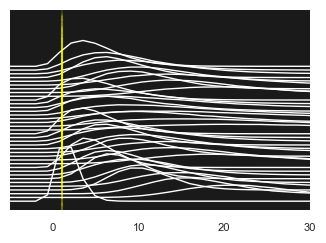

In [41]:
import joypy
import matplotlib.pyplot as plt

%matplotlib inline

fig, axes = joypy.joyplot(bayes_melted,by="Simulation", column="Bayes Factor", ylabels=False, xlabels=True, 
                          grid=False, fill=False, background='k', linecolor="w", linewidth=1,
                          legend=False, overlap=0.5, figsize=(3,2),kind="counts", bins=100)

plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Dashed line in log(3)
for a in axes:
    a.axvline(x=np.log(3), color='yellow', linestyle='--', alpha=0.2)

ticks = [0, 10, 20, 30]

for a in axes:
    a.set_xlim([-5,30])   
    a.set_xticks(ticks)   
    a.tick_params(axis='both', which='major', labelsize=8)

In [42]:
# Cohen-d (effect size)

# List for storage
cohen_d = []

for file in files:
    # Load in the file
    ttests = np.load(file, allow_pickle=True)
    # Get the values
    d_list = []
    for i in range(len(ttests)):
        d = ttests[i][0][5]
        d_list.append(d)

    d_list = [float(i) for i in d_list]

    # Append to cohen-d's, together with the name of the file
    cohen_d.append([file, d_list])

# Get the names of the files
file_names = [i[0] for i in cohen_d]
file_names = [i.split('\\')[-1] for i in file_names]
file_names = [i.split('.npy')[0] for i in file_names]

# Make a df
cohen_d_df = pd.DataFrame()

# Loop over the lists in cohen d
for i in range(len(cohen_d)):
    # Get the list
    d_list = cohen_d[i][1]
    # Add the list to the df
    cohen_d_df[file_names[i]] = d_list

# Melt it
cohen_d_melted = cohen_d_df.melt(var_name='Simulation', value_name='Cohen d')

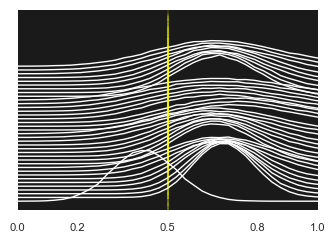

In [43]:
import joypy
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = joypy.joyplot(cohen_d_melted,by="Simulation", column="Cohen d", ylabels=False, xlabels=True, 
                          grid=False, fill=False, background='k', linecolor="w", linewidth=1,
                          legend=False, overlap=0.5, figsize=(3,2),kind="counts", bins=100)

plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
ticks = [0, 0.2, 0.5, 0.8, 1]

# Dashed line at 0.5
for a in axes:
    a.axvline(x=0.5, color='yellow', linestyle='--', alpha=0.2)

for a in axes:
    a.set_xlim([0,1])
    a.set_xticks(ticks)
    a.tick_params(axis='both', which='major', labelsize=8)


## Contrast distribution

Let's now compute a contrast between gesture and vocal distributions. We will use it as additional information about the difference between these two modalities

However, note that we will not compute difference across all 100,000 repetitions of one simulation, but pick a random sample from each simulation type

In [ ]:
# Get all the files in the data folder
simfiles = glob.glob(os.path.join(simfolder, '*.npy'))

In [ ]:
# Load in each file, and compute the contrast between gesture and vocal for each list in the file

# Empty list for storage
contrast_list = []

for file in simfiles:
    print('working on file: ', file)
    # Load in the file
    expressibility = np.load(file, allow_pickle=True)
    # Pick a random number
    random_number = np.random.randint(0, 100000, 1)
    # Assess the expressibility for that number
    contrast_within_file = []
    
    express_array = np.array(expressibility[random_number])
    vocal = np.sum(express_array[0][:, 1])
    gesture = np.sum(express_array[0][:, 2])
            
    # Calculate the contrast
    contrast = np.array(gesture) - np.array(vocal)
    # Append to contrast_within_file
    contrast_within_file.append(contrast)
        
    # Append to contrast_list with the name of the file
    contrast_list.append([file, contrast_within_file])

# Save the contrast_list as a numpy
np.save(os.path.join(datafolder, 'contrast_list_1.npy'), contrast_list)


In [ ]:
# Load in the contrast_list if needed
contrast_list = np.load(os.path.join(datafolder, 'contrast_list_1.npy'), allow_pickle=True)

# Make a df
contrast_df = pd.DataFrame()

# Loop over the lists in contrast_list
for i in range(len(contrast_list)):
    filename = contrast_list[i][0]
    filename = filename.split('\\')[-1]
    filename = filename.split('.npy')[0]

    # Loop over the lists in contrast_list[i][1]
    for j in range(len(contrast_list[i][1])):
        # Get the values from this list
        iter = contrast_list[i][1][j]
        # Add the iteration to filename with _
        iter_filename = filename + '_' + str(j)
        
        # Bind it to df
        iter_series = pd.Series(iter, name=iter_filename)
        contrast_df = pd.concat([contrast_df, iter_series], axis=1)

# Save it
contrast_df.to_csv(os.path.join(datafolder, 'contrast_df.csv'))
contrast_df

,exp_12_10_0,exp_12_15_0,exp_12_20_0,exp_18_10_0,exp_18_15_0,exp_18_20_0,exp_24_10_0,exp_24_15_0,exp_24_20_0,exp_cat_random_12_10_0,...,exp_pos_24_20_0,exp_semcat_12_10_0,exp_semcat_12_15_0,exp_semcat_12_20_0,exp_semcat_18_10_0,exp_semcat_18_15_0,exp_semcat_18_20_0,exp_semcat_24_10_0,exp_semcat_24_15_0,exp_semcat_24_20_0
0,0.098536,-0.420968,0.589854,-0.342435,0.413604,0.097417,-0.426486,0.741896,0.529035,0.533571,...,0.284501,-0.186375,0.601171,-0.517734,0.103574,0.465678,0.137847,0.181460,-0.126977,0.841884
1,0.255460,0.019620,0.119073,0.135947,0.062679,-0.419645,0.496640,-0.213182,0.121364,0.707908,...,-0.000582,0.219702,0.512276,0.310944,0.348215,0.719038,0.373801,0.613393,0.837025,0.779110
2,0.655050,-0.185828,0.636445,0.415612,-0.117445,0.576275,0.093918,0.494871,0.222408,0.270297,...,-0.378557,-0.157504,0.883863,0.133022,-0.089996,0.483642,0.232535,-0.095806,0.720969,0.294372
3,0.461476,0.383602,-0.137707,0.672465,0.299277,-0.253159,0.097815,0.600162,-0.286707,-0.187033,...,0.304002,0.097203,0.519298,0.406041,0.399773,-0.228046,0.009021,0.119713,0.412588,0.607362
4,0.350355,-0.016180,0.207432,0.264681,0.320545,0.150903,0.207730,0.693888,-0.789590,0.064989,...,0.349744,0.571970,0.296568,0.592370,0.395041,0.173811,-0.218162,-0.055340,-0.087994,0.878065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.559871,NaN,...,0.355661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.502876
476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.111297,NaN,...,-0.685390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.903307
477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.918646,NaN,...,0.118899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.360998
478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.359358,NaN,...,0.347282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276218


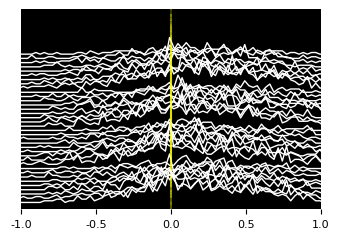

In [ ]:
import joypy
import matplotlib.pyplot as plt
%matplotlib inline

# Melt the df
contrast_melt = contrast_df.melt(var_name='Simulation', value_name='Contrast')

fig, axes = joypy.joyplot(contrast_melt,by="Simulation", column="Contrast", ylabels=False, xlabels=True, 
                          grid=False, fill=False, background='k', linecolor="w", linewidth=1,
                          legend=False, overlap=0.5, figsize=(3,2),kind="counts", bins=100)

plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
# Dashed line in 0
for a in axes:
    a.axvline(x=0, color='yellow', linestyle='--', alpha=0.2)

ticks = [-1, -0.5, 0, 0.5, 1]

for a in axes:
    a.set_xlim([-1,1]) 
    a.set_xticks(ticks)   
    a.set_xticklabels(a.get_xticks(), fontsize=8)  

# R Handling

In [29]:
import json

# get all the simulations into list
files = glob.glob(os.path.join(simfolder, '*.npy'))


In [26]:
def convert_npy_to_json(npy_file, json_filepath):
    # Build list of dicts with concepts, gesture and vocal expressibilities for each simulation
    export_data = []

    for sim_id, sim_result in enumerate(npy_file):
        concepts = []
        gesture_expressibilities = []
        vocal_expressibilities = []
        
        for concept in sim_result:
            concepts.append(concept[0])  # Add concept name
            gesture_expressibilities.append(concept[2])  # Add gesture expressibility list
            vocal_expressibilities.append(concept[1])    # Add vocal expressibility list
        
        # Add each sim_id with its corresponding concepts and expressibilities
        export_data.append({
            'sim_id': sim_id,
            'concepts': concepts,
            'gesture_expressibilities': gesture_expressibilities,
            'vocal_expressibilities': vocal_expressibilities
        })

    # Save to JSON in sim folder
    with open(os.path.join(json_filepath), 'w') as f:
        json.dump(export_data, f, indent=4)



In [30]:
for file in files:
    name = file.split('\\')[-1].split('.npy')[0]
    print('working on file: ', name)

    jsonfile = os.path.join(simfolder, name + '.json')

    # if the file exists, skip it
    if os.path.exists(jsonfile):
        print('File already exists, skipping...')
        continue
    
    # Load in the npy file
    npy_file = np.load(file, allow_pickle=True)

    # Convert to JSON
    convert_npy_to_json(npy_file, jsonfile)
    

working on file:  exp_18_20
File already exists, skipping...
working on file:  exp_18_15
File already exists, skipping...
working on file:  exp_18_10
File already exists, skipping...
working on file:  exp_24_20
File already exists, skipping...
working on file:  exp_24_15
File already exists, skipping...
working on file:  exp_24_10
File already exists, skipping...
working on file:  exp_12_20
File already exists, skipping...
working on file:  exp_12_15
File already exists, skipping...
working on file:  exp_12_10
File already exists, skipping...
working on file:  exp_semcat_18_20
File already exists, skipping...
working on file:  exp_semcat_18_15
File already exists, skipping...
working on file:  exp_semcat_18_10
File already exists, skipping...
working on file:  exp_semcat_24_20
File already exists, skipping...
working on file:  exp_semcat_24_15
File already exists, skipping...
working on file:  exp_semcat_24_10
File already exists, skipping...
working on file:  exp_semcat_12_20
File alr